## Background

#### Right now we use polynomial extrapolation to extract waveforms, and we use COM corrections in post-processing. This notebook will look at the differences between the different polynomial extrapolation methods with and without COM corrections and the CCE extracted waveform.

#### Polynomial extrapolation outputs the strain (h) of the waveform. CCE outputs the Bondi News function (N). N is the retarted time derivative of the strain (N=d_u h), and so since it's more difficult to integrate than to differentiate, the first stage of analysis will be differentiating the strain values and comparing them to the corresponding N values.

#### The CCE code also only evolves ONE radii at a time, with each simulation having multiple Levs and each Lev having multiple worldtube radii data sets.

### Lev2, R100

#### The CCE code outputs News.h5 and NewsNoninertial.h5 (among other .h5 files). For the polynomial extrapolation, we have rhOverM_Asymptotic_GeometricUnits.h5/{Extrapolated$_$[N2,N3,N4].dir, OutmostExtraction.dir} and a similarly structured rMPsi4_Asymptotic_GeometricUnits.h5.

In [2]:
import scri
import numpy as np
import matplotlib.pyplot as plt

In [13]:
N_CCE = scri.SpEC.read_from_h5('Lev2_R100/Lev2_AA/News.h5')

/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:150: UserWarning: 
`frameType` was not found in 'Lev2_R100/Lev2_AA/News.h5' or the keyword arguments.
Using default value `Inertial`.  You may want to set it manually.


  warnings.warn(warning)
/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:165: UserWarning: 
`dataType` was not found in 'Lev2_R100/Lev2_AA/News.h5' or the keyword arguments.
Using default value `news`.  You may want to set it manually.
  warnings.warn(warning)
/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:179: UserWarning: 
`r_is_scaled_out` was not found in 'Lev2_R100/Lev2_AA/News.h5' or the keyword arguments.
Using default value `True`.  You may want to set it manually.


  warnings.warn(warning)
/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:189: UserWarning: 
`m_is_scaled_out` was not found in 'Lev2_R100/Lev2_AA/News.h5' or the keyword arguments.
Using default value `True`.  You

In [14]:
#N_CCE_noninertial = scri.SpEC.read_from_h5('Lev2_R100/Lev2_AA/NewsNoninertial.h5') 
##as seen from errors below, doesn't automatically read in non inertial data right. Can't find the correct
## keyword arguments to specify frameType

In [47]:
h_N2 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N2.dir')
h_N3 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N3.dir')
h_N4 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N4.dir')
h_Outer = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/OutermostExtraction.dir')

AttributeError: 'WaveformModes' object has no attribute 'amp'

In [16]:
N_CCE.dataType

9

In [17]:
h_N2.dataType

7

#### While I can't find a nice way to manually set the data type (let alone frame type, so non-intertial will have to wait), the default in scri.SpEC.read_from_h5 is to return the data type number +8 when reading from waveforms to GWFrames... which doesn't really make sense for either of these.

#### 0=Unknown, 1=h, 2=hdot (News), 3=Psi4, 4=Psi3, 5=Psi2, 6=Psi1, 7=Psi0

#### It's seen in other codes that the reading in of rhOverM files does give h. I'll have to trust that, but I'm nervous about whether or not N is treated correctly.

In [18]:
hdot_N2 = h_N2.data_dot #time derivative of h from N=2 extrapolated data

In [19]:
np.shape(hdot_N2)

(13843, 77)

In [20]:
np.shape(N_CCE.data)

(8926, 225)

In [21]:
np.shape(h_N2.data)

(13843, 77)

#### In h, hdot there are 13,843 3 item entries for each of the 77 SWSH options (l<=8). N has 8926 3 item entries for 225 SWSH options (l<=14). So scri is potentially reading in the News correctly.

In [22]:
import h5py

In [23]:
f = h5py.File('Lev2_R100/Lev2_AA/News.h5','r')

In [24]:
g = h5py.File('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5')

In [25]:
print(len(f.keys()))

225


In [26]:
print(sorted(f.keys()))
print(f.keys()[0])

[u'Y_l0_m0.dat', u'Y_l10_m-1.dat', u'Y_l10_m-10.dat', u'Y_l10_m-2.dat', u'Y_l10_m-3.dat', u'Y_l10_m-4.dat', u'Y_l10_m-5.dat', u'Y_l10_m-6.dat', u'Y_l10_m-7.dat', u'Y_l10_m-8.dat', u'Y_l10_m-9.dat', u'Y_l10_m0.dat', u'Y_l10_m1.dat', u'Y_l10_m10.dat', u'Y_l10_m2.dat', u'Y_l10_m3.dat', u'Y_l10_m4.dat', u'Y_l10_m5.dat', u'Y_l10_m6.dat', u'Y_l10_m7.dat', u'Y_l10_m8.dat', u'Y_l10_m9.dat', u'Y_l11_m-1.dat', u'Y_l11_m-10.dat', u'Y_l11_m-11.dat', u'Y_l11_m-2.dat', u'Y_l11_m-3.dat', u'Y_l11_m-4.dat', u'Y_l11_m-5.dat', u'Y_l11_m-6.dat', u'Y_l11_m-7.dat', u'Y_l11_m-8.dat', u'Y_l11_m-9.dat', u'Y_l11_m0.dat', u'Y_l11_m1.dat', u'Y_l11_m10.dat', u'Y_l11_m11.dat', u'Y_l11_m2.dat', u'Y_l11_m3.dat', u'Y_l11_m4.dat', u'Y_l11_m5.dat', u'Y_l11_m6.dat', u'Y_l11_m7.dat', u'Y_l11_m8.dat', u'Y_l11_m9.dat', u'Y_l12_m-1.dat', u'Y_l12_m-10.dat', u'Y_l12_m-11.dat', u'Y_l12_m-12.dat', u'Y_l12_m-2.dat', u'Y_l12_m-3.dat', u'Y_l12_m-4.dat', u'Y_l12_m-5.dat', u'Y_l12_m-6.dat', u'Y_l12_m-7.dat', u'Y_l12_m-8.dat', u'Y_l12

In [27]:
print(g.keys())

[u'Extrapolated_N2.dir', u'Extrapolated_N3.dir', u'Extrapolated_N4.dir', u'OutermostExtraction.dir']


In [28]:
i = h5py.File(g.keys()[0])

In [29]:
i.keys()

[]

In [30]:
g.values()

[<HDF5 group "/Extrapolated_N2.dir" (78 members)>,
 <HDF5 group "/Extrapolated_N3.dir" (78 members)>,
 <HDF5 group "/Extrapolated_N4.dir" (78 members)>,
 <HDF5 group "/OutermostExtraction.dir" (78 members)>]

In [31]:
i.values()

[]

#### If we're comparing apples to apples, should only use the same SWSHs as what's in hdot. Presumably 2<=l<=8, so leave out the l=0,1,9,10,11,12,13,14 components of N. Also have a disparage in regards to number of time steps.

In [32]:
h_N2.t

array([ -108.75620268,  -107.86958602,  -106.98733195, ...,  3846.39849108,
        3846.49848814,  3846.59848521])

In [33]:
N_CCE.t

array([  0.00000000e+00,   5.00000000e-01,   1.00000000e+00, ...,
         4.46250000e+03,   4.46300000e+03,   4.46350000e+03])

In [34]:
test = h_N2.t - h_N2.t[0]

In [35]:
test

array([  0.00000000e+00,   8.86616663e-01,   1.76887073e+00, ...,
         3.95515469e+03,   3.95525469e+03,   3.95535469e+03])

#### Uh oh, the time steps are off. One has to manually put the times to start and end in the DoMultpleRuns file, and from the SpEC.out info the ending time for this sim is 4463.5 M. Maybe we need to just pull the timing out of the waveforms themselves? Or is one of these using retarded time and the other not?

In [36]:
LM_indices = [[2, 2], [2, 1], [3, 3], [3,2] , [3, 1], [4,4],[4,2]]
LM_indices = [[ell, m] for ell, m in LM_indices if [ell, m] in N_CCE.LM.tolist()]
indices = [(ell * (ell + 1) - 2 ** 2 + m) for ell, m in LM_indices]

N_popped = N_CCE.data[:,indices]

In [37]:
LM_indices = [[2, 2], [2, 1], [3, 3], [3,2] , [3, 1], [4,4],[4,2]]
LM_indices = [[ell, m] for ell, m in LM_indices if [ell, m] in h_N2.LM.tolist()]
indices = [(ell * (ell + 1) - 2 ** 2 + m) for ell, m in LM_indices]

h_popped = h_N2
h_popped.data = h_N2.data[:,indices]

In [38]:
hdot = h_popped.data_dot

In [39]:
np.shape(hdot_popped)

(13843, 35)

In [40]:
np.shape(N_popped)

(8926, 7)

In [41]:
%matplotlib inline

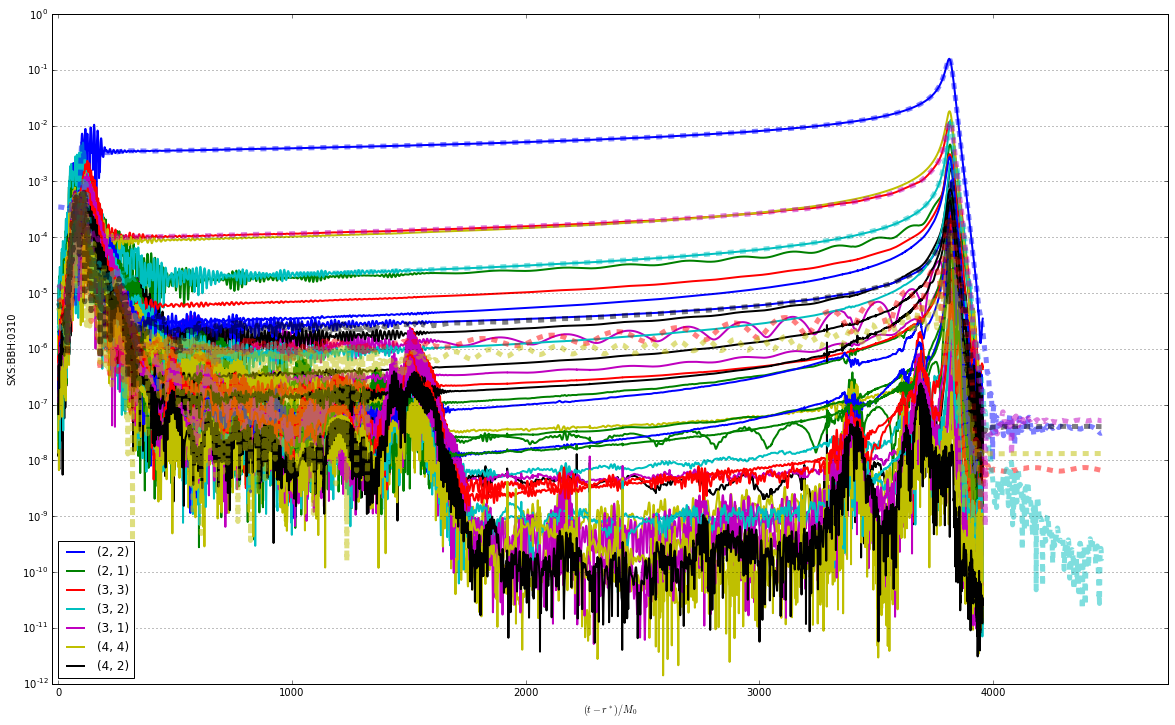

In [42]:
fig=plt.figure(figsize=(20, 12))

lines = plt.semilogy(h_N2.t-h_N2.t[0], abs(hdot_popped), alpha=1, lw=2)
for line, index, (ell, m) in zip(lines, indices, LM_indices):
    plt.semilogy(N_CCE.t, abs(N_CCE.data[:, index]),alpha=.5, lw=5,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))
#lines1 = ax1.semilogy(w_m1.t, abs(w_m1.data[:, indices]), alpha=1, lw=1.5)
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310') #Mode amplitudes')
#plt.ylim(1e-5, 0.6)
plt.xlim(-25,4750)
plt.grid(axis='y')
leg=plt.legend(['(2, 2)', '(2, 1)', '(3, 3)', '(3, 2)','(3, 1)', '(4, 4)','(4, 2)'], loc='lower left')

plt.show()

#### Looks pretty similar when aligned at start time t=0. Merger seems to happen at the same time and it's only the 3,1 and 4,4 modes that aren't aligned. 3,1 is pretty subtle, but 4,4 is pretty serious.

In [43]:
indices

[4, 3, 11, 10, 9, 20, 18]

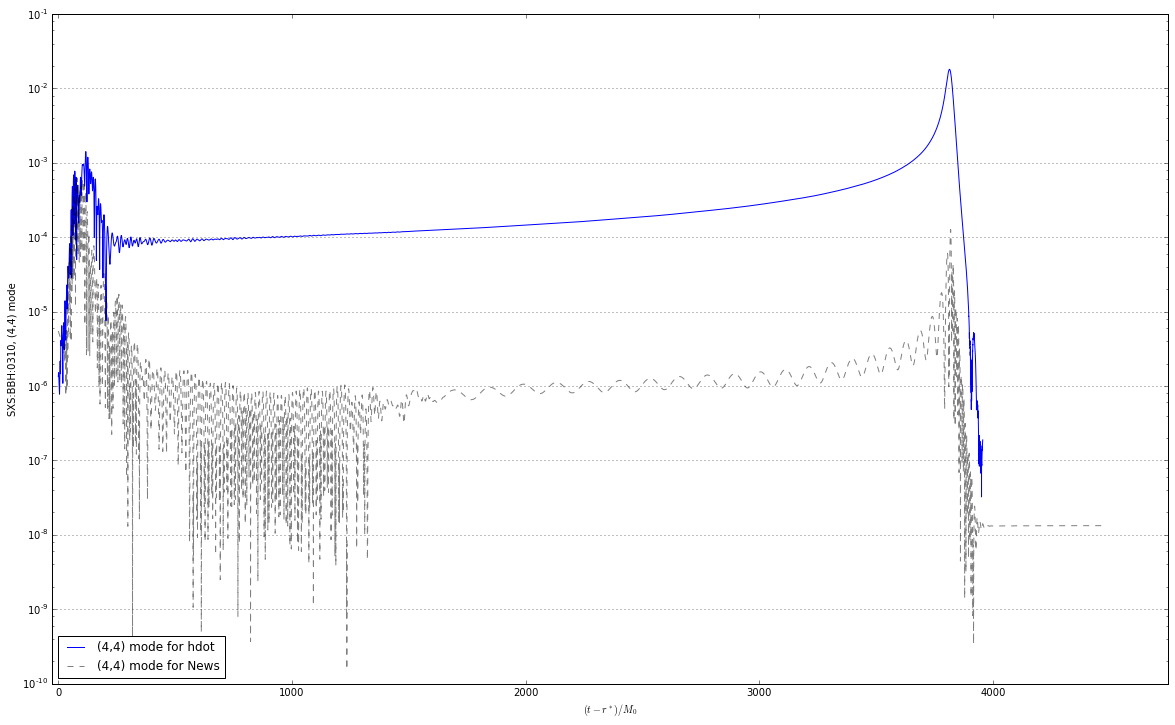

In [44]:
fig=plt.figure(figsize=(20, 12))

plt.semilogy(h_N2.t-h_N2.t[0], abs(hdot_popped[:,5]), alpha=1, lw=1)
plt.semilogy(N_CCE.t, abs(N_CCE.data[:,20]),alpha=.5, color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))
#lines1 = ax1.semilogy(w_m1.t, abs(w_m1.data[:, indices]), alpha=1, lw=1.5)
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, (4,4) mode') #Mode amplitudes')
#plt.ylim(1e-5, 0.6)
plt.xlim(-25,4750)
plt.grid(axis='y')
leg=plt.legend(['(4,4) mode for hdot','(4,4) mode for News'], loc='lower left')

plt.show()

#### Not only is the News version of 4,4 much smaller than the hdot version, it's noisy much further into the simulation AND has more modulation. It should be noted that I'm not using COM corrected waveform data here, but the original data.

#### I'm not sure just how many modes to consider here, now that I see some of them don't line up by quite a bit. Let's look at them one l at a time:

In [48]:
LM_indices = [[2, 2], [2, 1], [3, 3], [3,2] , [3, 1], [4,4],[4,3],[4,2],[4,1],
              [5,5],[5,4],[5,3],[5,2],[5,1],[6,6],[6,5],[6,4],[6,3],[6,2],[6,1],
              [7,7],[7,6],[7,5],[7,4],[7,3],[7,2],[7,1],[8,8],[8,7],[8,6],[8,5],[8,4],[8,3],[8,2],[8,1]]
LM_indices = [[ell, m] for ell, m in LM_indices if [ell, m] in h_N2.LM.tolist()]
indices = [(ell * (ell + 1) - 2 ** 2 + m) for ell, m in LM_indices]

h_popped = h_N2
h_popped.data = h_N2.data[:,indices]

In [49]:
hdot_popped = h_popped.data_dot

In [50]:
indices

[4,
 3,
 11,
 10,
 9,
 20,
 19,
 18,
 17,
 31,
 30,
 29,
 28,
 27,
 44,
 43,
 42,
 41,
 40,
 39,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 76,
 75,
 74,
 73,
 72,
 71,
 70,
 69]

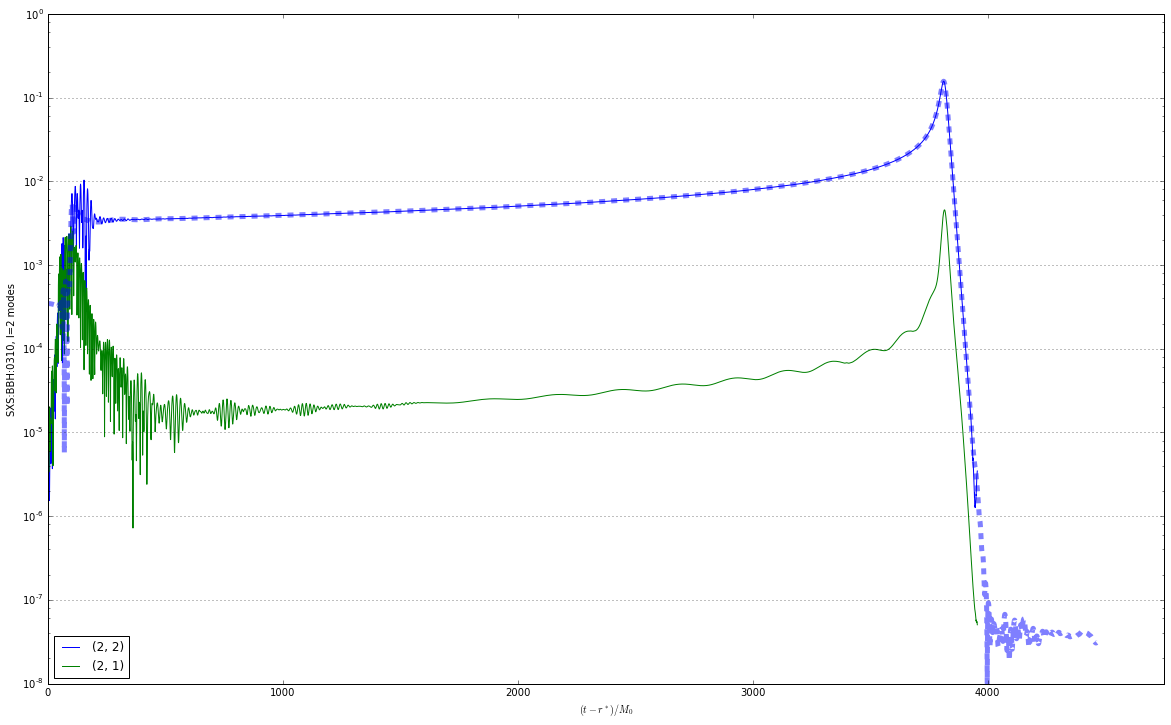

In [51]:
fig=plt.figure(figsize=(20, 12))

lines = plt.semilogy(h_N2.t-h_N2.t[0], abs(hdot_popped[:,[0,1]]), alpha=1, lw=1)
for line, index, (ell, m) in zip(lines, indices, LM_indices):
    plt.semilogy(N_CCE.t, abs(N_CCE.data[:, index]),alpha=.5, lw=5,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, l=2 modes') #Mode amplitudes')
#plt.ylim(1e-5, 0.6)
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(2, 2)', '(2, 1)'], loc='lower left')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

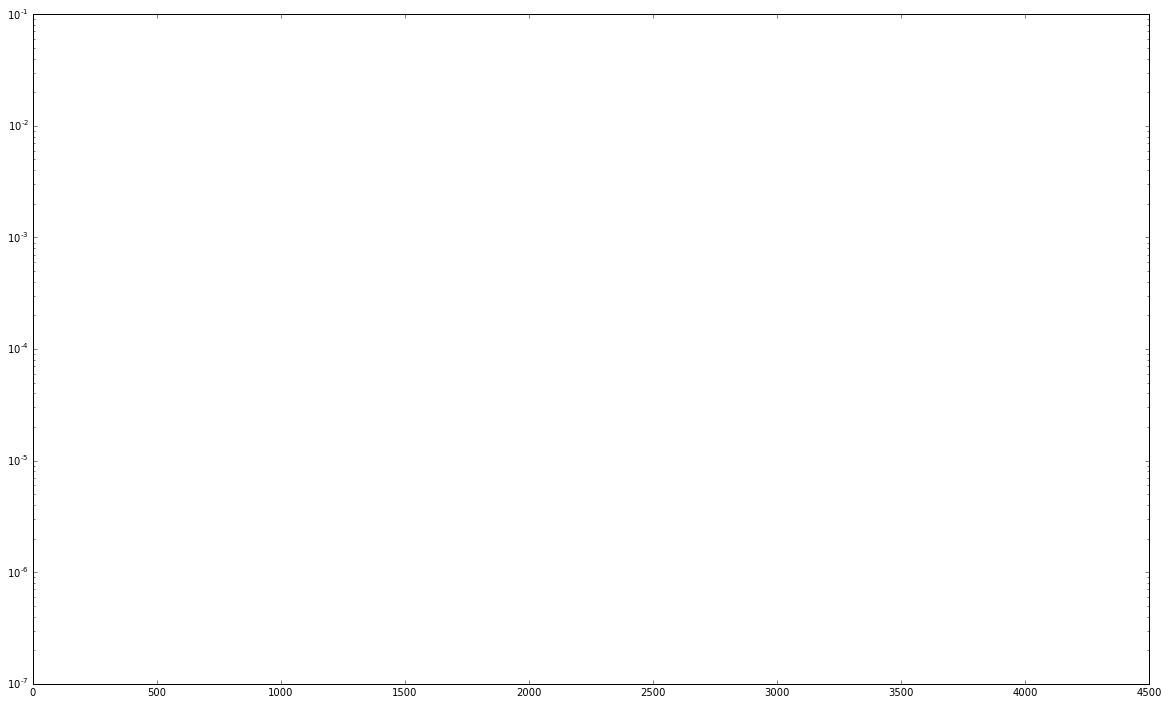

In [52]:
fig=plt.figure(figsize=(20, 12))

#lines = plt.semilogy(h_N2.t-h_N2.t[0], abs(hdot_popped[:,[0,1]]), alpha=1, lw=1)
#for line, index, (ell, m) in zip(lines, indices, LM_indices):
plt.semilogy(N_CCE.t, abs(N_CCE.data[:, 3]),alpha=.5, lw=5)#,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, l=2 modes') #Mode amplitudes')
#plt.ylim(1e-5, 0.6)
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(2, 1)'], loc='lower left')

plt.show()

In [53]:
abs(N_CCE.data[:,3])

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

#### ... So 2,1 wasn't calculated for this particular simulation.

/home/woodford/.conda/envs/my_root/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


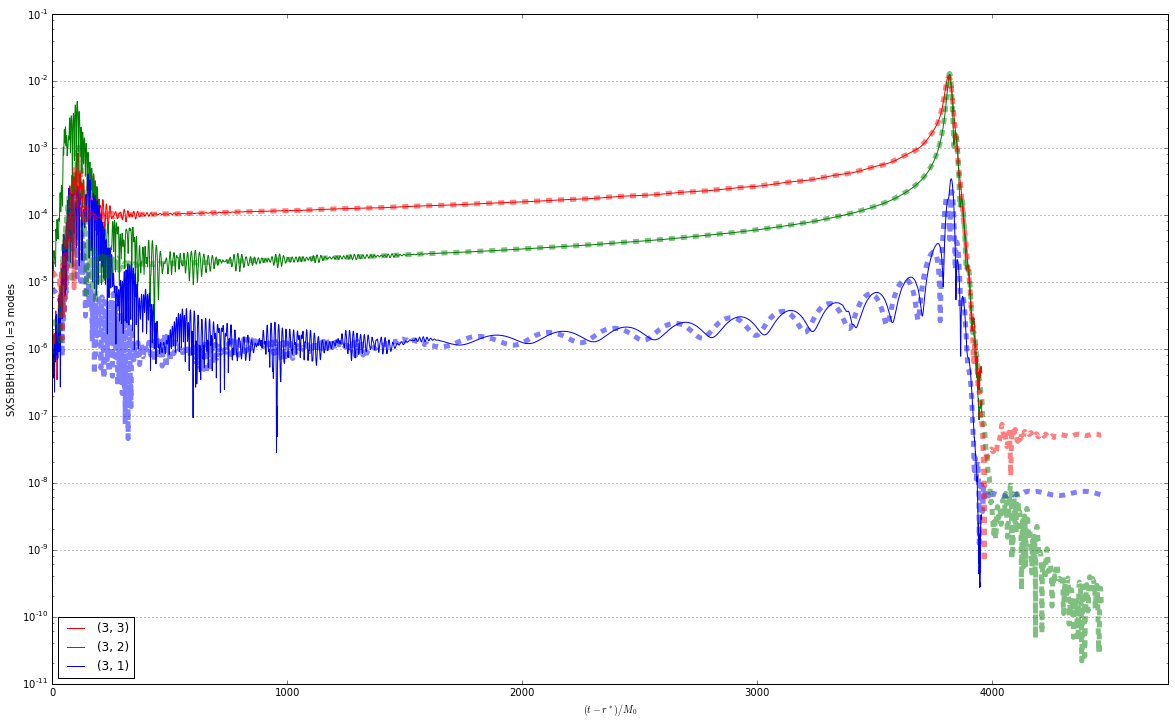

In [54]:
fig=plt.figure(figsize=(20, 12))
colorcycle = ['red', 'green', 'blue']
plt.gca().set_color_cycle(colorcycle+colorcycle[::-1])

lines = plt.semilogy(h_N2.t-h_N2.t[0], abs(hdot_popped[:,[2,3,4]]), alpha=1, lw=1)
#for line, index, (ell, m) in zip(lines, indices, LM_indices):
#    plt.semilogy(N_CCE.t, abs(N_CCE.data[:, index]),alpha=.5, lw=5,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))    

lines1 = plt.semilogy(N_CCE.t,abs(N_CCE.data[:,indices[2:5]]),alpha=.5, lw=5,linestyle='dashed')    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, l=3 modes') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(3, 3)','(3, 2)', '(3, 1)'], loc='lower left')

plt.show()

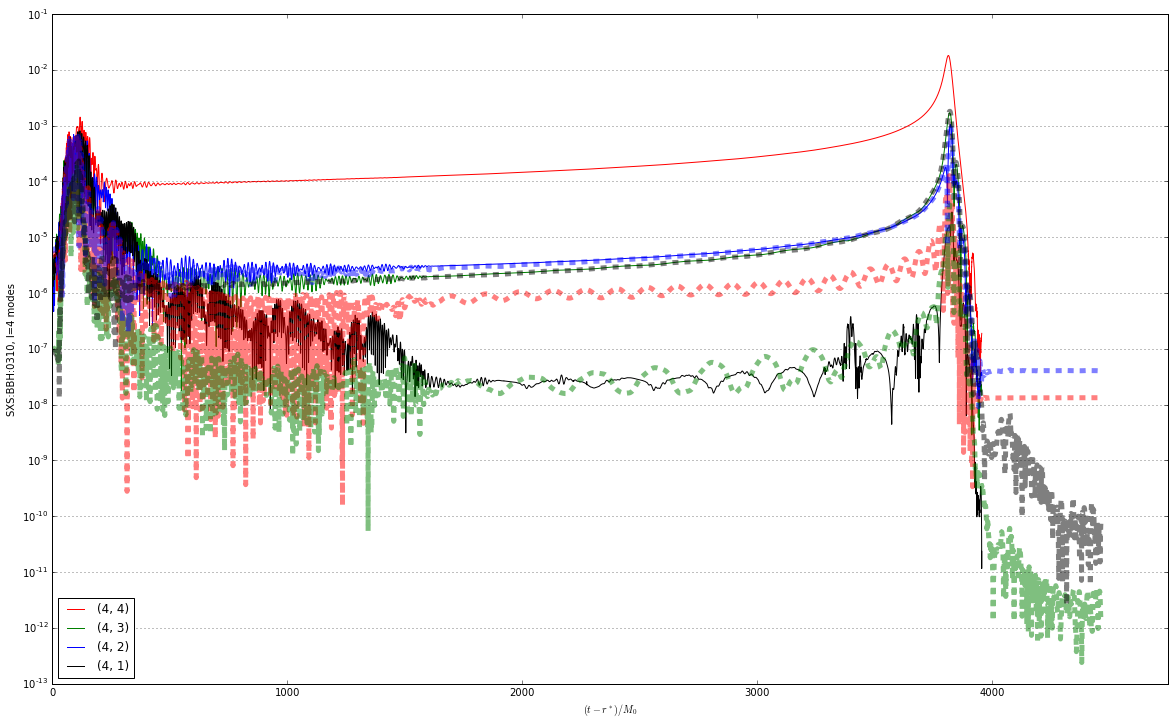

In [55]:
fig=plt.figure(figsize=(20, 12))
colorcycle = ['red', 'green', 'blue','black']
plt.gca().set_color_cycle(2*colorcycle)#+colorcycle[::-1])

lines = plt.semilogy(h_N2.t-h_N2.t[0], abs(hdot_popped[:,[5,6,7,8]]), alpha=1, lw=1)
#for line, index, (ell, m) in zip(lines, indices, LM_indices):
#    plt.semilogy(N_CCE.t, abs(N_CCE.data[:, index]),alpha=.5, lw=5,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))    

lines1 = plt.semilogy(N_CCE.t,abs(N_CCE.data[:,indices[5:9]]),alpha=.5, lw=5,linestyle='dashed')    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, l=4 modes') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(4, 4)','(4, 3)','(4, 2)', '(4, 1)'], loc='lower left')

plt.show()

#### It looks like it's really just the (2,2) mode that comes out relatively similar. That, or the News is not labelled correctly. It seems like the m=2 modes are very similar to hdot, though that's not really enough to make a case.

#### !!! unless all the l>=10 modes are taking up spots??? Need to look at the keys of h compared to N to see how they're laid out.

#### Conversley, IF the l>8 modes are taking up space, we can make a guess as to where they'd be: l=10,11,12,13,14 would be between l=0 and l=1 (a BIG problem) and l=9 would be at the end. Since scri.SpEC.read_from_h5 sorts the Ylm data, that's the most likely scenario. It doesn't seem possible to pull the Ylm out of the already read-in data, so let's try assuming that the data is mixed up. Then l=0 would be the first index (0), l=10,11,12,13,14 would be the 1-97 indices, l=1 would be the 98,99,100 indices. Then l=9 would be the last 19 data points (indices 205-224).

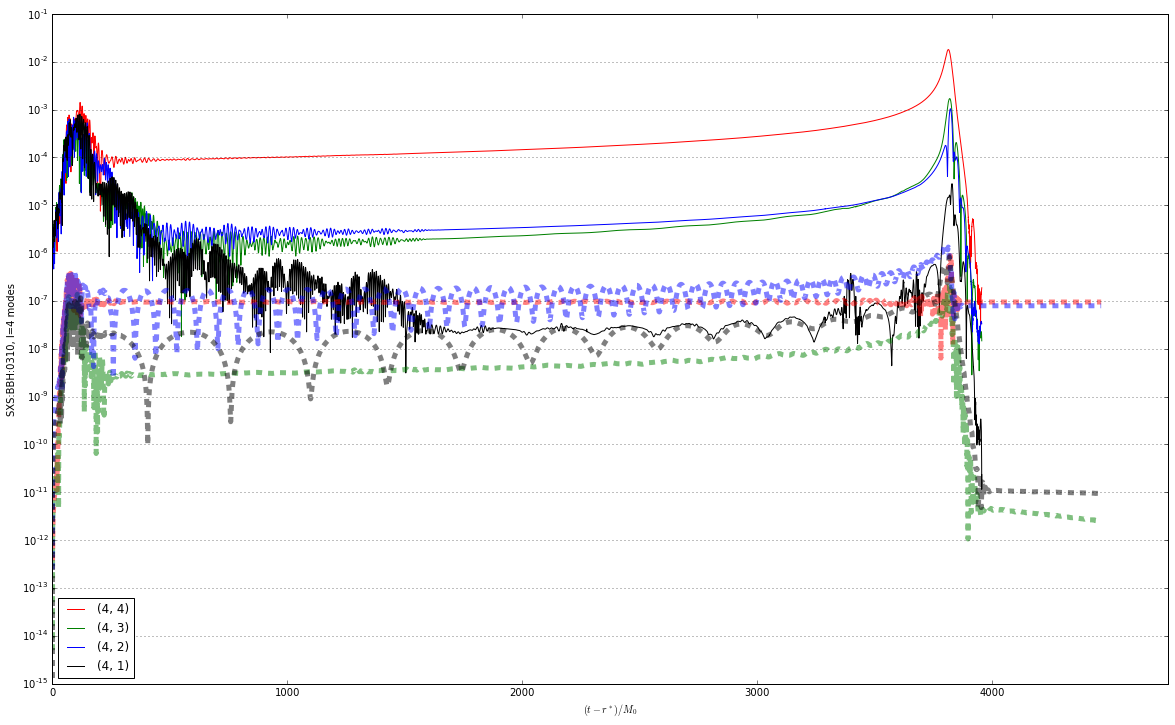

In [56]:
fig=plt.figure(figsize=(20, 12))
colorcycle = ['red', 'green', 'blue','black']
plt.gca().set_color_cycle(2*colorcycle)#+colorcycle[::-1])

lines = plt.semilogy(h_N2.t-h_N2.t[0], abs(hdot_popped[:,[5,6,7,8]]), alpha=1, lw=1)
#for line, index, (ell, m) in zip(lines, indices, LM_indices):
#    plt.semilogy(N_CCE.t, abs(N_CCE.data[:, index]),alpha=.5, lw=5,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))    

lines1 = plt.semilogy(N_CCE.t,abs(N_CCE.data[:,[x+96 for x in indices[5:9]]]),alpha=.5, lw=5,linestyle='dashed')    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, l=4 modes') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(4, 4)','(4, 3)','(4, 2)', '(4, 1)'], loc='lower left')

plt.show()

#### ...Is it some other sorting then?

#### Check with R=610 from Lev2 to see if it's an extraction radius issue.

In [57]:
N_610 = scri.SpEC.read_from_h5('Lev2_R610/News.h5')

/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:150: UserWarning: 
`frameType` was not found in 'Lev2_R610/News.h5' or the keyword arguments.
Using default value `Inertial`.  You may want to set it manually.


  warnings.warn(warning)
/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:165: UserWarning: 
`dataType` was not found in 'Lev2_R610/News.h5' or the keyword arguments.
Using default value `news`.  You may want to set it manually.
  warnings.warn(warning)
/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:179: UserWarning: 
`r_is_scaled_out` was not found in 'Lev2_R610/News.h5' or the keyword arguments.
Using default value `True`.  You may want to set it manually.


  warnings.warn(warning)
/home/woodford/.conda/envs/my_root/lib/python2.7/scri/SpEC/file_io.py:189: UserWarning: 
`m_is_scaled_out` was not found in 'Lev2_R610/News.h5' or the keyword arguments.
Using default value `True`.  You may want to set it manually.




In [58]:
np.shape(N_610.data)

(8935, 225)

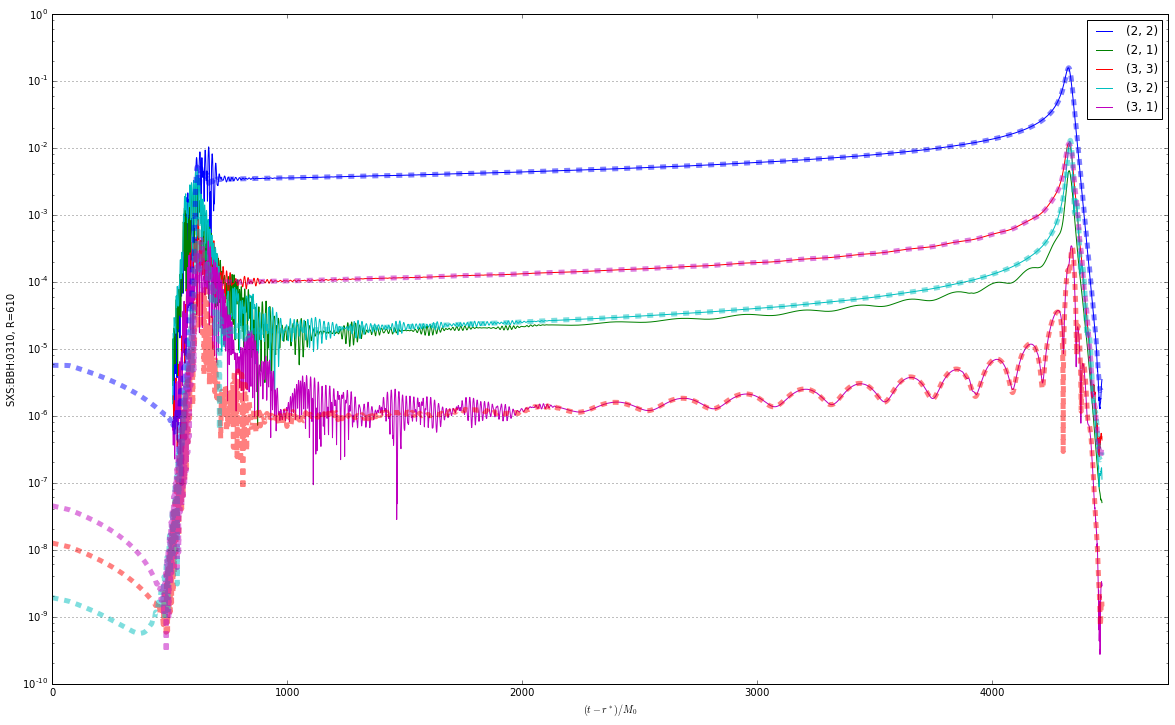

In [59]:
fig=plt.figure(figsize=(20, 12))
#colorcycle = ['red', 'green', 'blue']
#plt.gca().set_color_cycle(colorcycle+colorcycle[::-1])

lines = plt.semilogy(h_N2.t+N_610.t[-1]-h_N2.t[-1], abs(hdot_popped[:,0:5]), alpha=1, lw=1)
for line, index, (ell, m) in zip(lines, indices, LM_indices):
    plt.semilogy(N_610.t, abs(N_610.data[:, index]),alpha=.5, lw=5,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))    
    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(2, 2)', '(2, 1)', '(3, 3)', '(3, 2)','(3, 1)'])#, '(4, 4)','(4, 2)'], loc='lower left')

plt.show()

In [60]:
N_610.t

array([  0.00000000e+00,   5.00000000e-01,   1.00000000e+00, ...,
         4.46600000e+03,   4.46650000e+03,   4.46700000e+03])

In [61]:
h_N2.t

array([ -108.75620268,  -107.86958602,  -106.98733195, ...,  3846.39849108,
        3846.49848814,  3846.59848521])

#### So it's the same as before: 3,3 and 3,1 appear to be switched in their order, 2,2 looks good, and 2,1 isn't present. The next steps to try would be to read in the waveforms by hand to make sure that we're comparing the same modes.

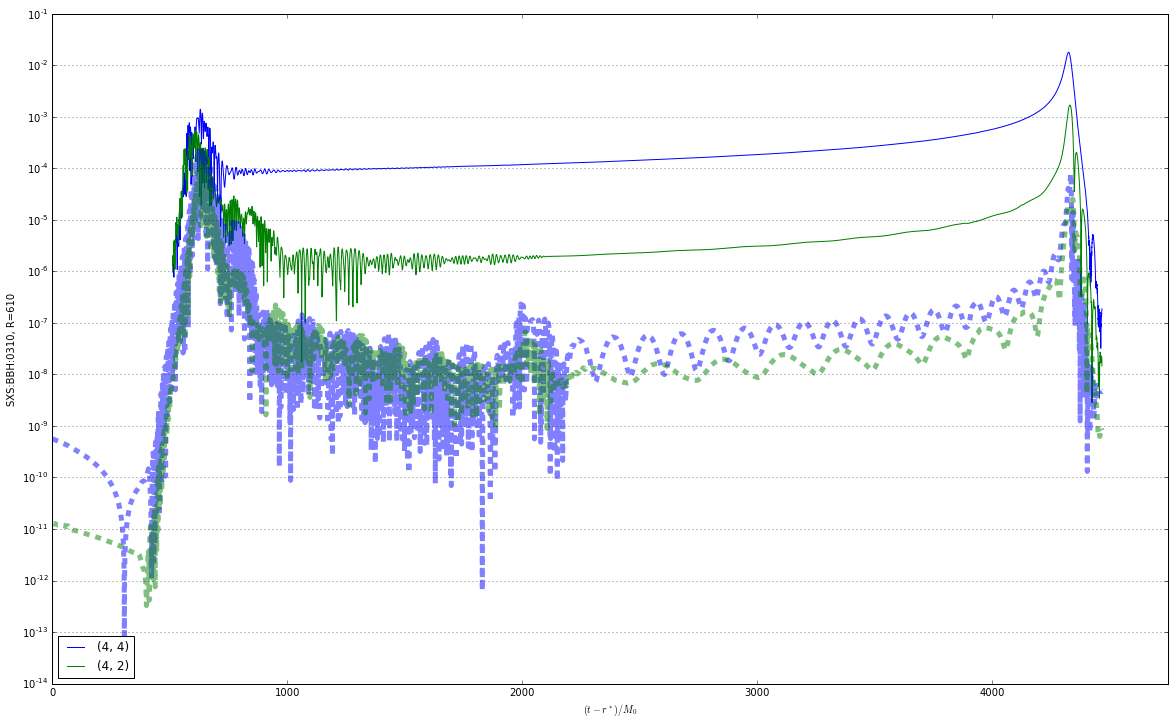

In [62]:
fig=plt.figure(figsize=(20, 12))
#colorcycle = ['red', 'green', 'blue']
#plt.gca().set_color_cycle(colorcycle+colorcycle[::-1])

lines = plt.semilogy(h_N2.t+N_610.t[-1]-h_N2.t[-1], abs(hdot_popped[:,5:7]), alpha=1, lw=1)
for line, index, (ell, m) in zip(lines, indices[5:7], LM_indices):
    plt.semilogy(N_610.t, abs(N_610.data[:, index]),alpha=.5, lw=5,color=plt.getp(line, 'color'),linestyle='dashed',label='({0}, {1})'.format(ell, m))    
    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(4, 4)','(4, 2)'], loc='lower left')

plt.show()

#### That's not good for the l=4 modes either... Going to have to try reading in by hand and comparing.

In [63]:
N_610test = h5py.File('Lev2_R610/News.h5','r')

In [64]:
print(N_610test.keys())

[u'Y_l6_m2.dat', u'Y_l12_m9.dat', u'Y_l11_m-9.dat', u'Y_l9_m3.dat', u'Y_l1_m1.dat', u'Y_l13_m11.dat', u'Y_l9_m4.dat', u'Y_l1_m0.dat', u'Y_l12_m-9.dat', u'Y_l3_m3.dat', u'Y_l8_m0.dat', u'Y_l14_m13.dat', u'Y_l13_m1.dat', u'Y_l4_m-4.dat', u'Y_l2_m0.dat', u'Y_l10_m-6.dat', u'Y_l4_m4.dat', u'Y_l4_m0.dat', u'Y_l13_m0.dat', u'Y_l11_m9.dat', u'Y_l6_m5.dat', u'Y_l9_m1.dat', u'Y_l10_m-3.dat', u'Y_l10_m4.dat', u'Y_l12_m-8.dat', u'Y_l13_m12.dat', u'Y_l9_m6.dat', u'Y_l5_m-2.dat', u'Y_l9_m0.dat', u'Y_l12_m-6.dat', u'Y_l8_m7.dat', u'Y_l10_m-8.dat', u'Y_l4_m3.dat', u'Y_l3_m-1.dat', u'Y_l3_m-3.dat', u'Y_l8_m-8.dat', u'Y_l10_m-10.dat', u'Y_l12_m-5.dat', u'Y_l12_m-7.dat', u'Y_l5_m2.dat', u'Y_l5_m-5.dat', u'Y_l7_m0.dat', u'Y_l12_m6.dat', u'Y_l7_m6.dat', u'Y_l14_m-2.dat', u'Y_l7_m1.dat', u'Y_l14_m10.dat', u'Y_l12_m7.dat', u'Y_l13_m-2.dat', u'Y_l7_m5.dat', u'Y_l14_m9.dat', u'Y_l9_m-9.dat', u'Y_l12_m-12.dat', u'Y_l11_m4.dat', u'Y_l4_m1.dat', u'Y_l8_m-5.dat', u'Y_l12_m-11.dat', u'Y_l8_m-7.dat', u'Y_l14_m-14.d

In [65]:
ntest = N_610test[N_610test.keys()[0]]
ntest

<HDF5 dataset "Y_l6_m2.dat": shape (8935, 3), type "<f8">

In [66]:
N_22 = N_610test[u'Y_l2_m2.dat']
N_21 = N_610test[u'Y_l2_m1.dat']
N_33 = N_610test[u'Y_l3_m3.dat']
N_31 = N_610test[u'Y_l3_m1.dat']
N_32 = N_610test[u'Y_l3_m2.dat']
N_44 = N_610test[u'Y_l4_m4.dat']
N_43 = N_610test[u'Y_l4_m3.dat']
N_42 = N_610test[u'Y_l4_m2.dat']
N_41 = N_610test[u'Y_l4_m1.dat']

In [67]:
N_22[:] #contains the time data in the first column, and then the real and complex data in the latter 2 columns

array([[  0.00000000e+00,  -9.78583013e-07,  -5.56496084e-06],
       [  5.00000000e-01,  -9.78579968e-07,  -5.56496691e-06],
       [  1.00000000e+00,  -9.78576257e-07,  -5.56496922e-06],
       ..., 
       [  4.46600000e+03,  -2.30619988e-06,  -8.26374165e-07],
       [  4.46650000e+03,  -2.52687448e-06,  -2.37905269e-07],
       [  4.46700000e+03,  -2.60758640e-06,   3.79802168e-07]])

In [68]:
N_22 = N_22[:, 1:3].view(dtype=np.complex)
N_21 = N_21[:, 1:3].view(dtype=np.complex)
N_33 = N_33[:, 1:3].view(dtype=np.complex)
N_32 = N_32[:, 1:3].view(dtype=np.complex)
N_31 = N_31[:, 1:3].view(dtype=np.complex)
N_44 = N_44[:, 1:3].view(dtype=np.complex)
N_43 = N_43[:, 1:3].view(dtype=np.complex)
N_42 = N_42[:, 1:3].view(dtype=np.complex)
N_41 = N_41[:, 1:3].view(dtype=np.complex)

In [69]:
N_22

array([[ -9.78583013e-07 -5.56496084e-06j],
       [ -9.78579968e-07 -5.56496691e-06j],
       [ -9.78576257e-07 -5.56496922e-06j],
       ..., 
       [ -2.30619988e-06 -8.26374165e-07j],
       [ -2.52687448e-06 -2.37905269e-07j],
       [ -2.60758640e-06 +3.79802168e-07j]])

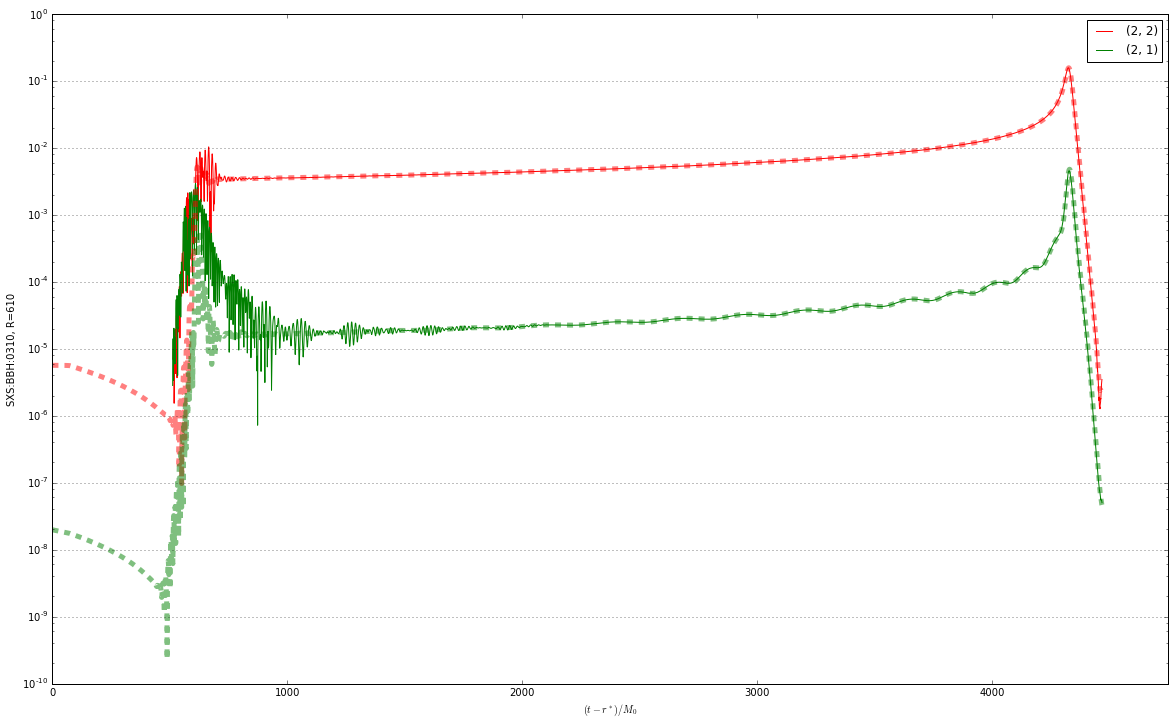

In [70]:
fig=plt.figure(figsize=(20, 12))
colorcycle = ['red', 'green']
plt.gca().set_color_cycle(2*colorcycle)

lines = plt.semilogy(h_N2.t+N_610.t[-1]-h_N2.t[-1], abs(hdot_popped[:,0:2]), alpha=1, lw=1)
plt.semilogy(N_610.t, abs(N_22),alpha=.5, lw=5,linestyle='dashed')
plt.semilogy(N_610.t, abs(N_21),alpha=.5, lw=5,linestyle='dashed')
    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(2, 2)', '(2, 1)']) #'(3, 3)', '(3, 2)','(3, 1)'])#, '(4, 4)','(4, 2)'], loc='lower left')

plt.show()

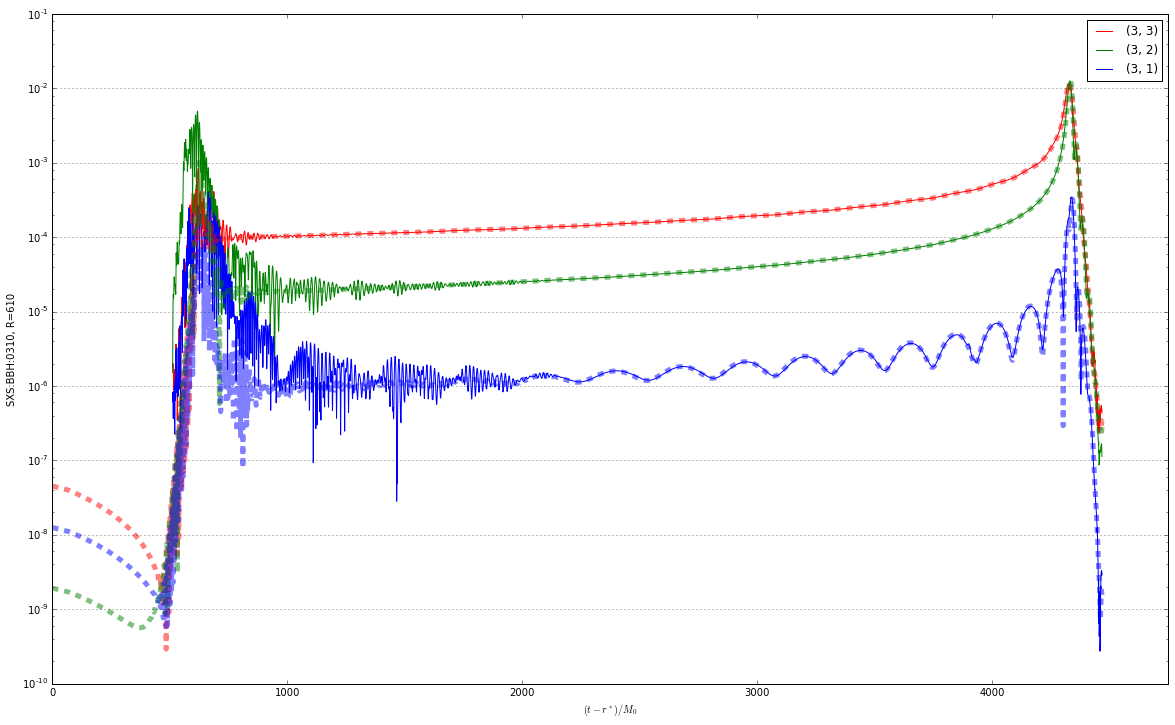

In [71]:
fig=plt.figure(figsize=(20, 12))
colorcycle = ['red', 'green','blue']
plt.gca().set_color_cycle(2*colorcycle)

lines = plt.semilogy(h_N2.t+N_610.t[-1]-h_N2.t[-1], abs(hdot_popped[:,2:5]), alpha=1, lw=1)
plt.semilogy(N_610.t, abs(N_33),alpha=.5, lw=5,linestyle='dashed')
plt.semilogy(N_610.t, abs(N_32),alpha=.5, lw=5,linestyle='dashed')
plt.semilogy(N_610.t, abs(N_31),alpha=.5, lw=5,linestyle='dashed')
    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(3, 3)', '(3, 2)','(3, 1)'])#, '(4, 4)','(4, 2)'], loc='lower left')

plt.show()

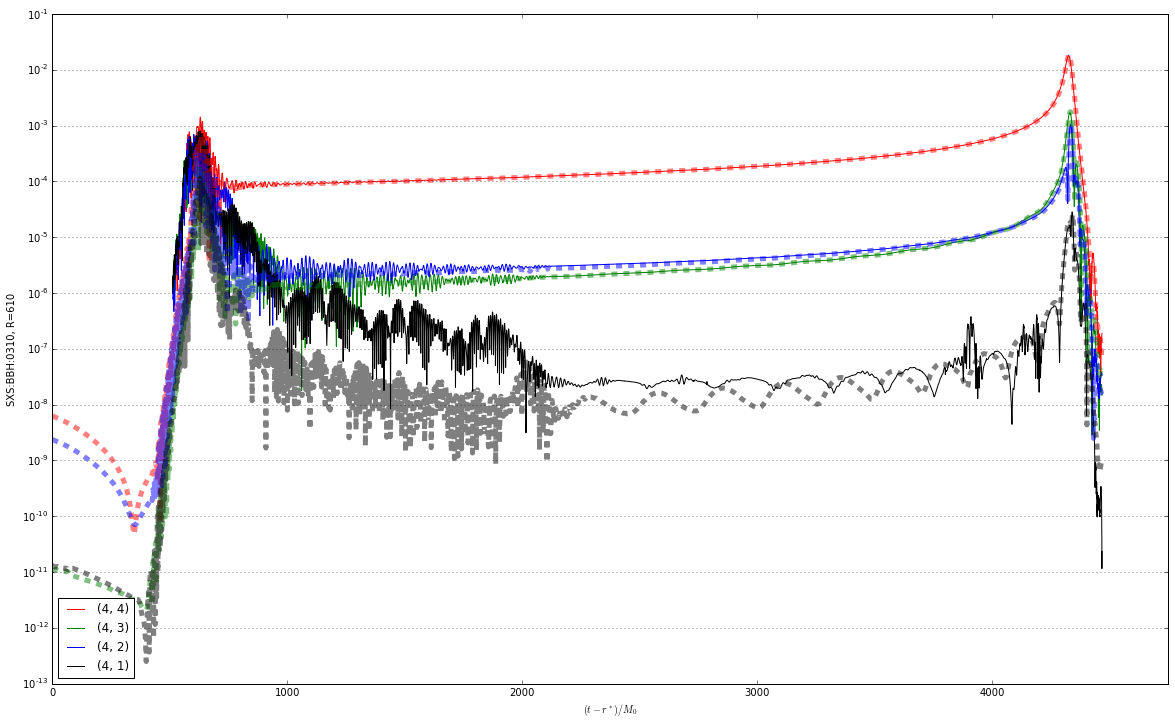

In [72]:
fig=plt.figure(figsize=(20, 12))
colorcycle = ['red', 'green','blue','black']
plt.gca().set_color_cycle(2*colorcycle)

lines = plt.semilogy(h_N2.t+N_610.t[-1]-h_N2.t[-1], abs(hdot_popped[:,5:9]), alpha=1, lw=1)
plt.semilogy(N_610.t, abs(N_44),alpha=.5, lw=5,linestyle='dashed')
plt.semilogy(N_610.t, abs(N_43),alpha=.5, lw=5,linestyle='dashed')
plt.semilogy(N_610.t, abs(N_42),alpha=.5, lw=5,linestyle='dashed')
plt.semilogy(N_610.t, abs(N_41),alpha=.5, lw=5,linestyle='dashed')
    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(4, 4)','(4, 3)','(4, 2)','(4, 1)'], loc='lower left')

plt.show()

#### OK, can assume that scri CANNOT read in the News correctly. Will need to make a new function that can do so without assuming how many l we use.

In [73]:
def index_is_monotonic(y): #copied from scri
    length = y.size
    monotonic = np.ones((length,), dtype=bool)
    direction = y[-1] - y[0]
    if direction > 0.0:
        max_value = y[0]
        for i in xrange(1, length):
            if y[i] <= max_value:
                monotonic[i] = False
            else:
                max_value = y[i]
    else:
        min_value = y[0]
        for i in xrange(1, length):
            if y[i] >= min_value:
                monotonic[i] = False
            else:
                min_value = y[i]
    return monotonic

def readNews(infile):
    #read in the News function from some .h5 file "file".
    #Assume that the file contains the Data sets correctly (ie. no subgroups)
    #Assume that the first column is the time data
    #Assume that the second column is the real part of the news
    #Assume that the third column is the imaginary part of the news
    #Do not assume ordering or number of l,m (ie. don't assume the number or ordering of data sets)
    
    #The output is the time array and the News with modes ordered with increading l and from 
    #smallest negative to largest positive m using index = l(l+1)+m.
    
    import h5py
    import re
    
    f = h5py.File(infile,'r')
    T = f[f.keys()[0]][:,0] #Random mode to get the length of time array
    monotonic = index_is_monotonic(T)
    times = T[monotonic]
    
    News = np.empty((len(times), len(f.keys())), dtype=complex) 
    #number of time steps, number of modes
    
    for key in list(f.keys()):
        lm = re.findall(r"\d+",key)
        l = int(lm[0])
        m = int(lm[1])
        if '-' in key:
            #then m is actually negative. Update it
            m=-m
        
        N = f[key]
        News[:,l*(l+1)+m] = N[:, 1:3].view(dtype=np.complex)[monotonic,0]
    
    return times, News #time values and modes

In [74]:
times,ntest = readNews('Lev2_R610/News.h5')

In [75]:
ntest

array([[ -0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 -0.00000000e+00j,
         -0.00000000e+00 +0.00000000e+00j, ...,
         -8.50839454e-15 -3.98674447e-16j,
         -2.71279382e-15 -2.13894957e-15j,
         -1.55334565e-14 +2.74942867e-15j],
       [ -0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 -0.00000000e+00j,
         -0.00000000e+00 +0.00000000e+00j, ...,
         -8.50827113e-15 -3.98558238e-16j,
         -2.71270452e-15 -2.13891568e-15j,
         -1.55340974e-14 +2.74989385e-15j],
       [ -0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 -0.00000000e+00j,
         -0.00000000e+00 +0.00000000e+00j, ...,
         -8.50859104e-15 -3.98680318e-16j,
         -2.71278085e-15 -2.13876919e-15j,
         -1.55335425e-14 +2.74860346e-15j],
       ..., 
       [ -0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 -0.00000000e+00j,
         -0.00000000e+00 +0.00000000e+00j, ...,
         -1.15494200e-13 +5.71530285e-12j,
          5.861693

In [76]:
ell = [2,2,3,3,3,4,4,4,4]
em = [2,1,3,2,1,4,3,2,1]
indices = [l*(l+1)+m for l,m in zip(ell,em)]

In [77]:
indices

[8, 7, 15, 14, 13, 24, 23, 22, 21]

In [78]:
np.shape(ntest[:,8])

(8935,)

In [79]:
%matplotlib inline

In [80]:
%matplotlib inline

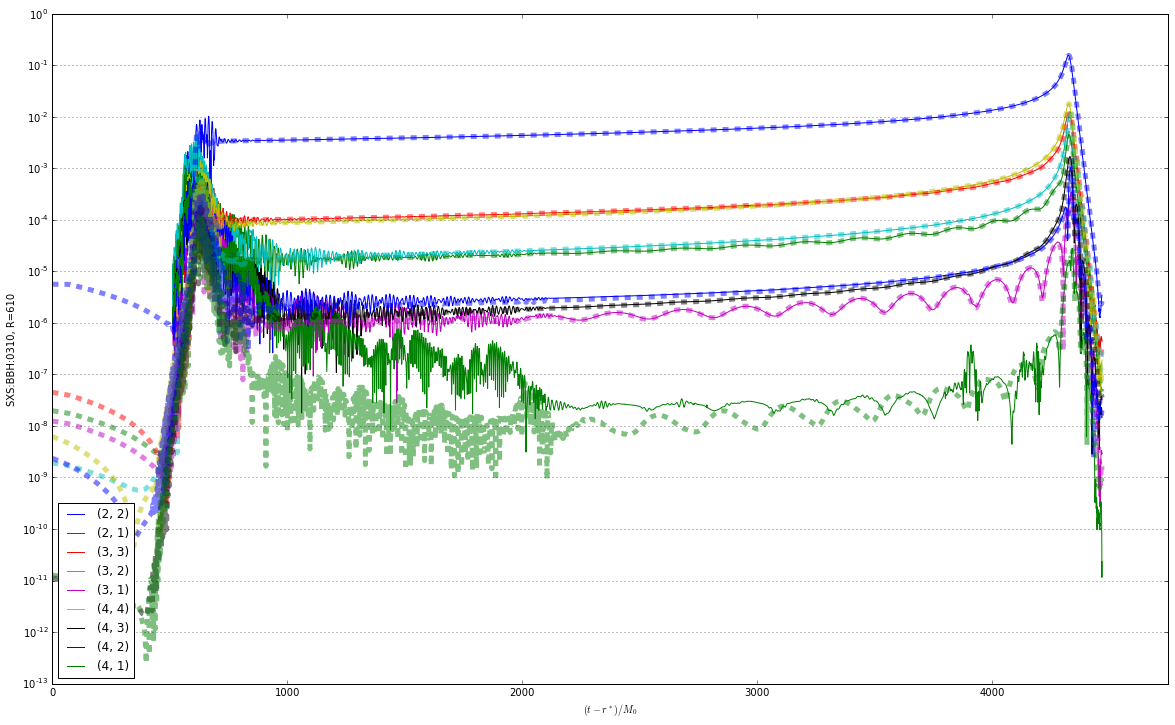

In [82]:
fig=plt.figure(figsize=(20, 12))
#colorcycle = ['red', 'green','blue','black','purple']
#plt.gca().set_color_cycle(2*colorcycle)

lines = plt.semilogy(h_N2.t+times[-1]-h_N2.t[-1], abs(hdot_popped[:,0:9]), alpha=1, lw=1)
for line, index in zip(lines, indices):
    plt.semilogy(times, abs(ntest[:,index]),alpha=.5, lw=5,linestyle='dashed',color=plt.getp(line, 'color'))

    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610') #Mode amplitudes')
plt.xlim(0,4750)
plt.grid(axis='y')
leg=plt.legend(['(2, 2)','(2, 1)','(3, 3)','(3, 2)','(3, 1)','(4, 4)','(4, 3)','(4, 2)','(4, 1)'], loc='lower left')

plt.savefig("Modes_R610.pdf",bbox="tight_inches")

#### Ok, looks like that works! Will need to clean up that function in the furture, but at least we know which modes are which now. It also looks like the news and hdot line up pretty well - now we can actually start some analysis.

# Absolute differences

#### The hdot data has more data in the same time frame as the news AND these two datasets are time shifted compared to each other - so simple subtracting of arrays won't work here. It may help to map each mode into a smooth function and compare the functions instead, or to match the times in the news with the closest values in hdot and take differences at those indices specifically.

In [83]:
np.shape(hdot_popped)

(13843, 35)

In [84]:
np.shape(ntest)

(8935, 225)

In [85]:
h_N2.t

array([ -108.75620268,  -107.86958602,  -106.98733195, ...,  3846.39849108,
        3846.49848814,  3846.59848521])

In [86]:
times

array([  0.00000000e+00,   5.00000000e-01,   1.00000000e+00, ...,
         4.46600000e+03,   4.46650000e+03,   4.46700000e+03])

In [87]:
#find matching times between the news and hdot. Store the indices values
hdot_t = h_N2.t+times[-1]-h_N2.t[-1] #center back so that the merger happens at the same time, then only use values
#that both hdot and the news have values for   

In [88]:
hdot_t[0] #start at this value for the news.

511.64531211187887

In [89]:
tindices = np.empty(len(times[int(2*hdot_t[0]):]),dtype=int)
for idx in range(len(times[int(2*hdot_t[0]):])):
    tindices[idx] = int((np.abs(hdot_t - times[int(2*hdot_t[0])+idx])).argmin())

In [90]:
tindices

array([    0,     0,     1, ..., 13832, 13837, 13842])

#### Now have an array of the indices that will match the times in the News to the times in hdot (or the closest approximates). We can use this list to directly compare the News and hdot arrays, starting at t=511. The differences arrays should be shorter than times and the news functions by however many timesteps happen before t=511.

In [91]:
#try just the 2,2 mode at first
absdiff = [abs(x-y) for x,y in zip(hdot_popped[tindices,0],ntest[int(2*hdot_t[0]):,indices[0]])]

In [92]:
ntest[int(2*hdot_t[0]):,8]

array([ -4.43270443e-07 -6.40406587e-07j,
        -4.39790442e-07 -6.14509700e-07j,
        -4.39652381e-07 -5.91181184e-07j, ...,
        -2.30619988e-06 -8.26374165e-07j,
        -2.52687448e-06 -2.37905269e-07j,  -2.60758640e-06 +3.79802168e-07j])

In [93]:
len(absdiff)

7912

In [94]:
len(times[int(2*hdot_t[0]):])

7912

In [95]:
len(hdot_t)

13843

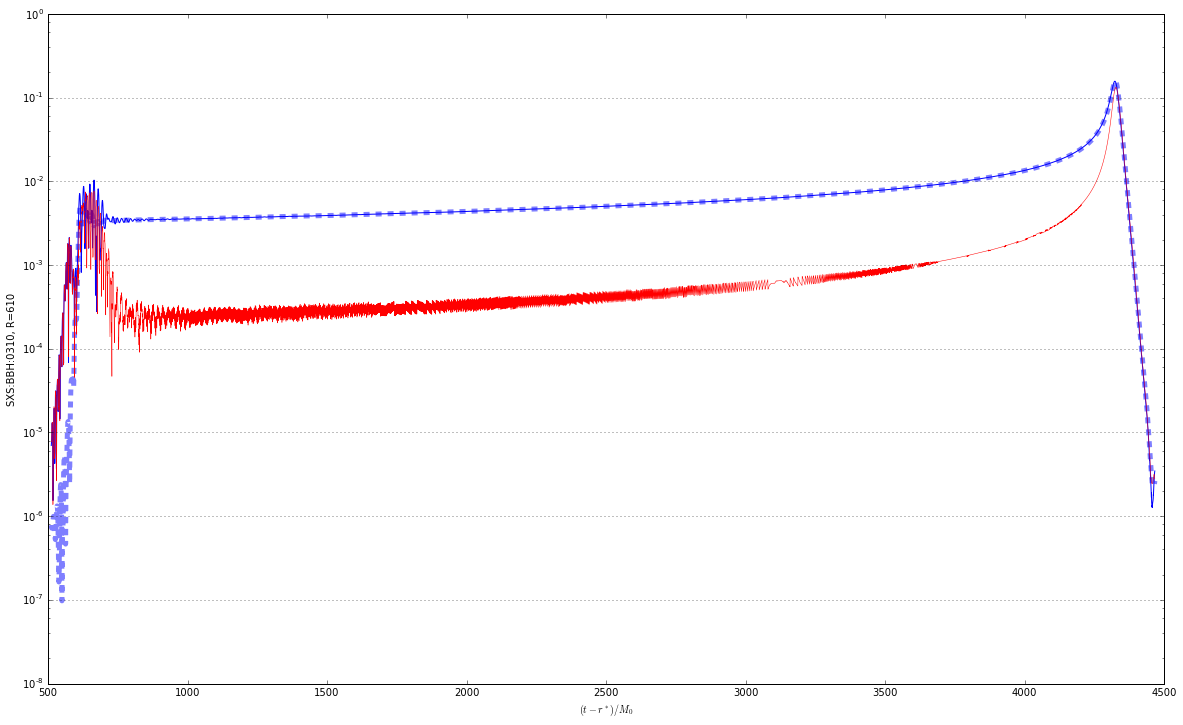

In [96]:
fig=plt.figure(figsize=(20, 12))

plt.semilogy(hdot_t, abs(hdot_popped[:,0]), alpha=1, lw=1,color='blue')
plt.semilogy(times[int(2*hdot_t[0]):], abs(ntest[int(2*hdot_t[0]):,indices[0]]),alpha=.5, lw=5,linestyle='dashed',color='blue')

plt.semilogy(times[int(2*hdot_t[0]):],absdiff,alpha=1,lw=0.5,color='red')
    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610') #Mode amplitudes')
#plt.xlim(0,4750)
plt.grid(axis='y')
#leg=plt.legend(['(2, 2)','(2, 1)','(3, 3)','(3, 2)','(3, 1)','(4, 4)','(4, 3)','(4, 2)','(4, 1)'], loc='lower left')

plt.show()

#### Hmm. So the absolute differences in the strongest mode are about an order of magnitude smaller than the mode itself, which isn't great. It's also only true until late inspiral, and shoots up at merger and ringdown. We're hoping for small differences so that we can say hdot and the news are the same/similar, but if they're much different then we'll need to really think about which is better and why.

# Relative differences

In [97]:
#trying the 2,2 mode again just as a test case
reldiff = [abs(x-y)/abs(x) for x,y in zip(hdot_popped[tindices,0],ntest[int(2*hdot_t[0]):,indices[0]])]

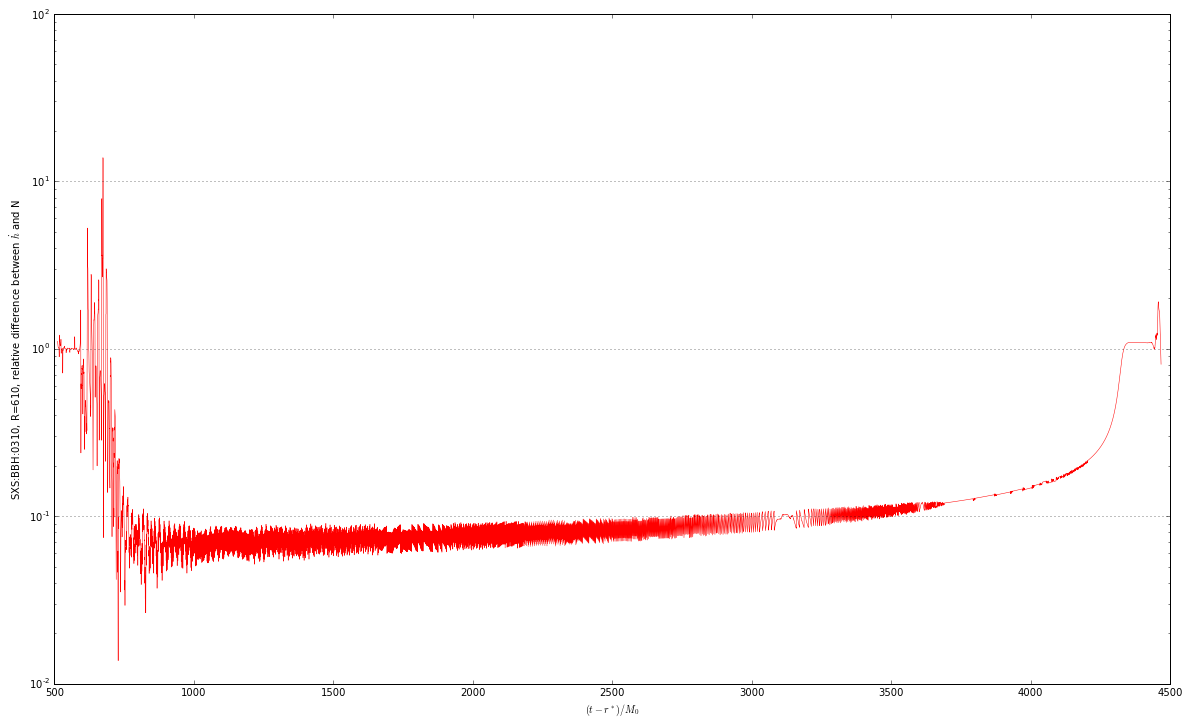

In [98]:
fig=plt.figure(figsize=(20, 12))

plt.semilogy(times[int(2*hdot_t[0]):],reldiff,alpha=1,lw=0.5,color='red')
    
plt.xlabel(r'$(t - r^*)/M_0$')
plt.ylabel(r'SXS:BBH:0310, R=610, relative difference between $\dot{h}$ and N') #Mode amplitudes')
#plt.xlim(0,4750)
plt.grid(axis='y')
#leg=plt.legend(['(2, 2)','(2, 1)','(3, 3)','(3, 2)','(3, 1)','(4, 4)','(4, 3)','(4, 2)','(4, 1)'], loc='lower left')

plt.show()

In [99]:
np.average(reldiff)

0.18803121471552053

In [100]:
np.average(absdiff)

0.00212689389031021

#### OK, let's look at the rest of the modes up to l=4. Will need to extend the analysis further (to l=8) eventually, though.

In [101]:
absdiffl4 = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)
reldiffl4 = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)

for idx in range(len(indices)):
    absdiffl4[:,idx] = [abs(x-y) for x,y in 
                        zip(hdot_popped[tindices,idx],ntest[int(2*hdot_t[0]):,indices[idx]])]
    reldiffl4[:,idx] = [abs(x-y)/abs(x) for x,y in 
                        zip(hdot_popped[tindices,idx],ntest[int(2*hdot_t[0]):,indices[idx]])]

In [102]:
for idx in range(len(indices)):
    print("absolute error avg:"+repr(np.average(absdiffl4[:,idx]))+
          " , relative error avg:"+repr(np.average(reldiffl4[:,idx]))+"\n")

absolute error avg:0.00212689389031021 , relative error avg:0.18803121471552053

absolute error avg:6.2523933907477513e-05 , relative error avg:0.22759654176562907

absolute error avg:0.00018937466378927308 , relative error avg:0.25606946375962836

absolute error avg:0.00013968849220663402 , relative error avg:0.28196614012234417

absolute error avg:8.5391778299546674e-06 , relative error avg:0.48148145798601566

absolute error avg:0.00031528511356027398 , relative error avg:0.32439968008214726

absolute error avg:2.4885519242499268e-05 , relative error avg:0.47178776562433983

absolute error avg:1.8178585046523262e-05 , relative error avg:0.43631310537615081

absolute error avg:1.1552022616662699e-05 , relative error avg:1.0653663584847233



#### need more data.

In [103]:
ell = [2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8]
em = [2,1,3,2,1,4,3,2,1,5,4,3,2,1,6,5,4,3,2,1,7,6,5,4,3,2,1,8,7,6,5,4,3,2,1]
indices = [l*(l+1)+m for l,m in zip(ell,em)]

In [104]:
len(indices)

35

In [134]:
indices

[8,
 7,
 15,
 14,
 13,
 24,
 23,
 22,
 21,
 35,
 34,
 33,
 32,
 31,
 48,
 47,
 46,
 45,
 44,
 43,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 80,
 79,
 78,
 77,
 76,
 75,
 74,
 73]

In [149]:
absdiffl4 = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)
reldiffl4 = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)

for idx in range(len(indices)):
    absdiffl4[:,idx] = abs(hdot_popped[tindices,idx]-ntest[int(2*hdot_t[0]):,indices[idx]])
    reldiffl4[:,idx] = abs(hdot_popped[tindices,idx]-ntest[int(2*hdot_t[0]):,indices[idx]])/abs(hdot_popped[tindices,idx])

In [142]:
abs(hdot_popped[tindices,0] - ntest[int(2*hdot_t[0]):,8]) #good, takes the difference for every time step

array([  7.72359602e-06,   7.69796978e-06,   8.18512211e-06, ...,
         2.98815223e-06,   2.89300631e-06,   2.79416073e-06])

In [150]:
np.shape(reldiffl4)

(7912, 35)

In [151]:
for idx in range(len(indices)):
    print(repr(idx)+": absolute error avg:"+repr(np.average(absdiffl4[:,idx]))+
          " , relative error avg:"+repr(np.average(reldiffl4[:,idx]))+"\n")

0: absolute error avg:0.00212689389031021 , relative error avg:0.18803121471552053

1: absolute error avg:6.2523933907477513e-05 , relative error avg:0.22759654176562907

2: absolute error avg:0.00018937466378927308 , relative error avg:0.25606946375962836

3: absolute error avg:0.00013968849220663402 , relative error avg:0.28196614012234417

4: absolute error avg:8.5391778299546674e-06 , relative error avg:0.48148145798601566

5: absolute error avg:0.00031528511356027398 , relative error avg:0.32439968008214726

6: absolute error avg:2.4885519242499268e-05 , relative error avg:0.47178776562433983

7: absolute error avg:1.8178585046523259e-05 , relative error avg:0.43631310537615081

8: absolute error avg:1.1552022616662699e-05 , relative error avg:1.0653663584847233

9: absolute error avg:5.8338083689840048e-05 , relative error avg:0.41291130795532643

10: absolute error avg:3.7337446200497176e-05 , relative error avg:0.49746668072479344

11: absolute error avg:4.9548485153407244e-06 

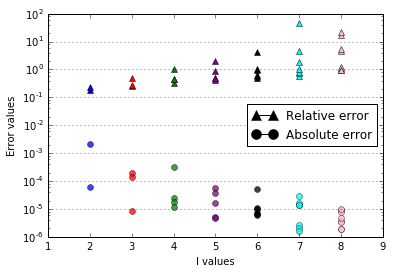

In [152]:
colors = ['blue','red','green','purple','black','cyan','pink','orange']

start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(absdiffl4[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiffl4[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=1)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Error values')
plt.xlabel(r'l values')
plt.xlim(1,9)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='^',color='black', markersize=10, label='Relative error'),
                   Line2D([0], [0], marker='o', color='black', label='Absolute error', markersize=10)]

plt.legend(handles=legend_elements,loc='center right')
plt.grid(axis='y')
plt.savefig('Errorrs_R610.pdf',bbox = 'tight_inches')

In [128]:
np.shape(reldiffl4)

(7912, 35)

#### Now we have difference data for the Lev2 R=610 data. We want to compare resolutions and radii, so should try and get similar data sets for all other instances to be complete, but maybe just Lev0,Lev2,Lev4 would be a good spacing for resolutions and R270,R440,R610 for the radii (ie. leave out R100). So, 9 runs in total for this one simulation.

#### It is also strange that these errors are so large... Kevin B. suggests looking at the amplitudes and phases (and their errors) rather than the full complex waveform to see if they're also as bad. It could also a mismatch on the times themselves - that adding the difference of the news time and the strain time to the strain time values is too rudimentary.

In [159]:
#take the amplitudes and phases of the news and hdot, which are currently in their cartesian representations
ntest[0,-1]

(-1.5533456540926776e-14+2.7494286680074967e-15j)

In [169]:
np.angle(ntest[0,-1])

2.966406650093464

In [161]:
abs(ntest[0,-1])

1.5774905074494817e-14

In [163]:
np.sqrt(1.5533456540926776e-14**2 + 2.7494286680074967e-15**2)

1.5774905074494817e-14

In [166]:
np.arctan2(2.7494286680074967e-15,1.5533456540926776e-14)

0.1751860034963294

#### abs() works to extract the amplitude. tan(phi) = b/a   (where z = a+ib) is the technical definition, but np.angle should also be giving the phase....

In [185]:
absampdiff = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)
relampdiff = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)

for idx in range(len(indices)):
    absampdiff[:,idx] = abs(hdot_popped[tindices,idx])-abs(ntest[int(2*hdot_t[0]):,indices[idx]])
    relampdiff[:,idx] = abs(abs(hdot_popped[tindices,idx])-abs(ntest[int(2*hdot_t[0]):,indices[idx]]))/abs(hdot_popped[tindices,idx])

In [186]:
np.average(relampdiff[:,0])

0.051268878211811517

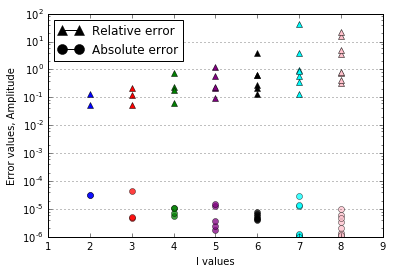

In [193]:
colors = ['blue','red','green','purple','black','cyan','pink','orange']

start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(absampdiff[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=1)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Error values, Amplitude')
plt.xlabel(r'l values')
plt.xlim(1,9)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='^',color='black', markersize=10, label='Relative error'),
                   Line2D([0], [0], marker='o', color='black', label='Absolute error', markersize=10)]

plt.legend(handles=legend_elements,loc='upper left')
plt.grid(axis='y')
plt.savefig('AmpError_R610.pdf',bbox_inches="tight")

In [251]:
absphasediff = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)
relphasediff = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)

for idx in range(len(indices)):
    absphasediff[:,idx] = np.arctan2(hdot_popped[tindices,idx].imag, 
                                hdot_popped[tindices,idx].real)-np.arctan2(ntest[int(2*hdot_t[0]):,indices[idx]].imag,
                                                                           ntest[int(2*hdot_t[0]):,indices[idx]].real)
    relphasediff[:,idx] = (np.arctan2(hdot_popped[tindices,idx].imag, 
                                hdot_popped[tindices,idx].real)-np.arctan2(ntest[int(2*hdot_t[0]):,indices[idx]].imag,
                                                                           ntest[int(2*hdot_t[0]):,indices[idx]].real))/(np.arctan2(hdot_popped[tindices,idx].imag, hdot_popped[tindices,idx].real)) 

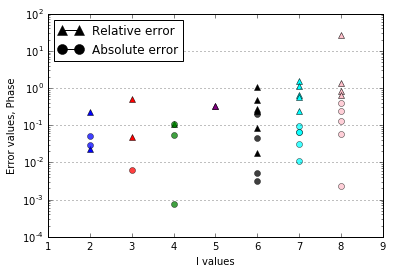

In [252]:
colors = ['blue','red','green','purple','black','cyan','pink','orange']

start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(absphasediff[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relphasediff[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=1)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Error values, Phase')
plt.xlabel(r'l values')
plt.xlim(1,9)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='^',color='black', markersize=10, label='Relative error'),
                   Line2D([0], [0], marker='o', color='black', label='Absolute error', markersize=10)]

plt.legend(handles=legend_elements,loc='upper left')
plt.grid(axis='y')
plt.savefig('PhaseError_R610.pdf',bbox_inches="tight")

In [268]:
absphasediff = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)
relphasediff = np.empty((len(times[int(2*hdot_t[0]):]), len(indices)), dtype=float)

for idx in range(len(indices)):
    absphasediff[:,idx] = (np.unwrap(np.angle(hdot_popped[tindices,idx]))-
                           np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[idx]])) - 
                          np.average(np.unwrap(np.angle(hdot_popped[tindices,idx]))-
                           np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[idx]]))))
    relphasediff[:,idx] = (np.unwrap(np.angle(hdot_popped[tindices,idx]))
                           -np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[idx]])) - 
                          np.average(np.unwrap(np.angle(hdot_popped[tindices,idx]))-
                           np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[idx]]))))/(np.unwrap(np.angle(hdot_popped[tindices,idx])))

In [264]:
len(np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[1]])))

7912

In [261]:
len((np.angle(hdot_popped[tindices,1])))

7912

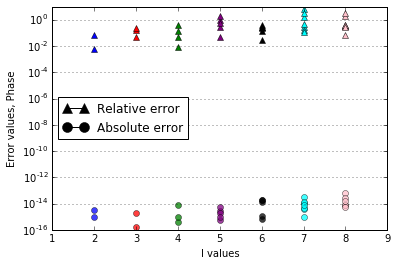

In [271]:
colors = ['blue','red','green','purple','black','cyan','pink','orange']

start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,abs(np.average(absphasediff[:,l-idx-1+start])),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,abs(np.average(relphasediff[:,l-idx-1+start])),marker = '^',color=colors[l-2],alpha=1)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Error values, Phase')
plt.xlabel(r'l values')
plt.xlim(1,9)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='^',color='black', markersize=10, label='Relative error'),
                   Line2D([0], [0], marker='o', color='black', label='Absolute error', markersize=10)]

plt.legend(handles=legend_elements,loc='center left')
plt.grid(axis='y')
plt.savefig('PhaseError2wphaseshift_R610.pdf',bbox_inches="tight")

In [201]:
np.unwrap(np.angle(hdot_popped[tindices,0]))

array([   1.27131378,    1.27131378,    1.62142178, ..., -242.62277575,
       -242.7920652 , -242.96292561])

In [200]:
np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[0]]))

array([  -2.17624813,   -2.19196645,   -2.21024335, ..., -285.54085756,
       -285.79105818, -286.02956716])

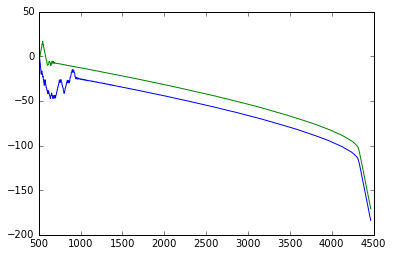

In [276]:
plt.plot(times[int(2*hdot_t[0]):],np.unwrap(np.angle(hdot_popped[tindices,1])), color='blue')
plt.plot(times[int(2*hdot_t[0]):],np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[1]])), color='green')

plt.show()

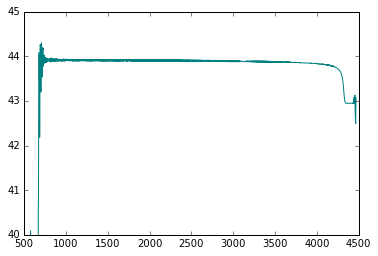

In [221]:
plt.plot(times[int(2*hdot_t[0]):],np.unwrap(np.angle(hdot_popped[tindices,0])) - 
         np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[0]])), color='teal')
plt.ylim(40,45)
plt.show()

In [275]:
np.average(np.unwrap(np.angle(hdot_popped[tindices,1])) - 
         np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[1]])))

-14.018046087025755

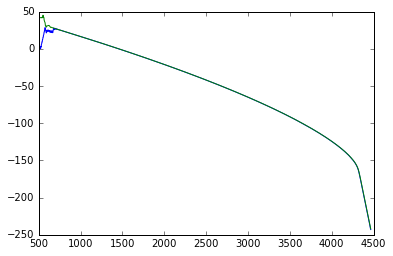

In [244]:
plt.plot(times[int(2*hdot_t[0]):],np.unwrap(np.angle(hdot_popped[tindices,0])), color='blue')
plt.plot(times[int(2*hdot_t[0]):],np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[0]]))+14*np.pi, color='green')

plt.show()

In [247]:
np.average(np.unwrap(np.angle(hdot_popped[tindices,0])) - 
         np.unwrap(np.angle(ntest[int(2*hdot_t[0]):,indices[0]])) - 43.2148)

1.1908807177851385e-05

In [240]:
np.where(600==tindices)

(array([1041]),)

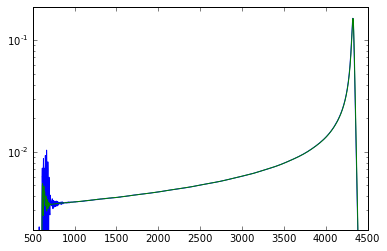

In [212]:
plt.semilogy(times[int(2*hdot_t[0]):],abs(hdot_popped[tindices,0]), color='blue')
plt.semilogy(times[int(2*hdot_t[0]):],abs(ntest[int(2*hdot_t[0]):,indices[0]]),color='green')

plt.ylim(2e-3,2e-1)

plt.show()

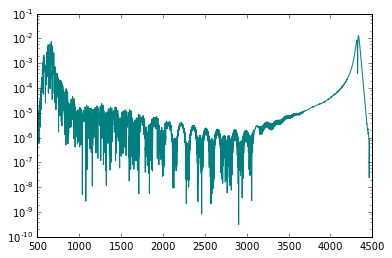

In [217]:
plt.semilogy(times[int(2*hdot_t[0]):],abs(abs(hdot_popped[tindices,0]) - abs(ntest[int(2*hdot_t[0]):,indices[0]])), color='teal')

# How reliable are the modes from h or N?

#### Also need to consider which modes are really worth looking at. Need to consider stability within h values for differenct extraction order and different resolution, and compare the News similarly. Then we can compare the "reliable" modes against SpECs current error limit and find out which modes are actually worth comparing N and h against each other. Should do this for h with the COM uncorrected and COM corrected waveforms. Use this run as an example, but will need to broaden to the catalog eventually.

## Consider the News 

In [323]:
times_Lev0_R270, N_Lev0_R270 = readNews('Lev0_R270/News.h5')
times_Lev0_R440, N_Lev0_R440 = readNews('Lev0_R440/News.h5')
times_Lev0_R610, N_Lev0_R610 = readNews('Lev0_R610/News.h5')
times_Lev2_R270, N_Lev2_R270 = readNews('Lev2_R270/News.h5')
times_Lev2_R440, N_Lev2_R440 = readNews('Lev2_R440/News.h5')
times_Lev2_R610, N_Lev2_R610 = readNews('Lev2_R610/News.h5')
times_Lev4_R270, N_Lev4_R270 = readNews('Lev4_R270/News.h5')
times_Lev4_R440, N_Lev4_R440 = readNews('Lev4_R440/News.h5')
times_Lev4_R610, N_Lev4_R610 = readNews('Lev4_R610/News.h5')

#### All the timing arrays start at t=0 and are monotonic. Since I remember the ending times for these Levs, and they're all within a few M of each other, the simplest thing to do is to just keep the smallest number of data points.

In [304]:
print(repr(len(times_Lev0_R270))+ ' '+repr(len(times_Lev2_R270))+ ' '+repr(len(times_Lev4_R270)))

8938 8931 8942


In [326]:
print(len(times_Lev2_R440))

8930


In [324]:
minsize = min(len(times_Lev0_R27070),letimes_Lev2_R440_Lev0_R440),len(times_Lev0_R610),
             len(times_Lev2_R270),len(times_Lev2_R440),len(times_Lev2_R610),
             len(times_Lev4_R270),len(times_Lev4_R440),len(times_Lev4_R610),)

#### Lev2 has the shortest arrays, so make Lev0 and Lev4 data only go to index 8930 in this case.

In [325]:
times_Lev0_R270 = times_Lev0_R270[:minsize]
times_Lev0_R440 = times_Lev0_R440[:minsize]
times_Lev0_R610 = times_Lev0_R610[:minsize]
times_Lev2_R270 = times_Lev0_R270[:minsize]
times_Lev2_R440 = times_Lev0_R440[:minsize]
times_Lev2_R610 = times_Lev0_R610[:minsize]
times_Lev4_R270 = times_Lev4_R270[:minsize]
times_Lev4_R440 = times_Lev4_R440[:minsize]
times_Lev4_R610 = times_Lev4_R610[:minsize]

In [327]:
N_Lev0_R270 = N_Lev0_R270[:minsize,:]
N_Lev0_R440 = N_Lev0_R440[:minsize,:]
N_Lev0_R610 = N_Lev0_R610[:minsize,:]
N_Lev2_R270 = N_Lev0_R270[:minsize,:]
N_Lev2_R440 = N_Lev0_R440[:minsize,:]
N_Lev2_R610 = N_Lev0_R610[:minsize,:]
N_Lev4_R270 = N_Lev4_R270[:minsize,:]
N_Lev4_R440 = N_Lev4_R440[:minsize,:]
N_Lev4_R610 = N_Lev4_R610[:minsize,:]

In [328]:
ell = [2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8] 
em = [2,1,3,2,1,4,3,2,1,5,4,3,2,1,6,5,4,3,2,1,7,6,5,4,3,2,1,8,7,6,5,4,3,2,1]
indices=[l*(l+1)+m for l,m in zip(ell,em)] #test out up to l=8

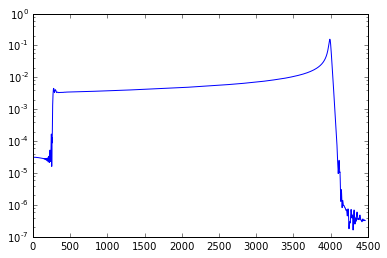

In [374]:
plt.semilogy(times_Lev0_R270,abs(N_Lev0_R270[:,indices[0]]))
plt.show()

#### Now that we have all the News data and the indices up to l=8 prepared, we can look at both the absolute and relative errors. Consider errors between extraction radii for the same Levs first, starting with Lev0.

### Comparison of Extraction radii within Levs

In [375]:
#consider comparisons of the modes themselves first, then look at amplitudes and phases

absdiff_Lev0_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
absdiff_Lev0_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
absdiff_Lev0_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev0_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev0_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev0_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)

absdiff_Lev2_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
absdiff_Lev2_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
absdiff_Lev2_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev2_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev2_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev2_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)

absdiff_Lev4_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
absdiff_Lev4_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
absdiff_Lev4_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev4_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev4_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
reldiff_Lev4_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)

In [376]:
for idx in range(len(indices)):
    absdiff_Lev0_R01[:,idx] = abs(N_Lev0_R270[:,indices[idx]] - N_Lev0_R440[:,indices[idx]])
    absdiff_Lev0_R02[:,idx] = abs(N_Lev0_R270[:,indices[idx]] - N_Lev0_R610[:,indices[idx]])
    absdiff_Lev0_R12[:,idx] = abs(N_Lev0_R440[:,indices[idx]] - N_Lev0_R610[:,indices[idx]])
    absdiff_Lev2_R01[:,idx] = abs(N_Lev2_R270[:,indices[idx]] - N_Lev2_R440[:,indices[idx]])
    absdiff_Lev2_R02[:,idx] = abs(N_Lev2_R270[:,indices[idx]] - N_Lev2_R610[:,indices[idx]])
    absdiff_Lev2_R12[:,idx] = abs(N_Lev2_R440[:,indices[idx]] - N_Lev2_R610[:,indices[idx]])
    absdiff_Lev4_R01[:,idx] = abs(N_Lev4_R270[:,indices[idx]] - N_Lev4_R440[:,indices[idx]])
    absdiff_Lev4_R02[:,idx] = abs(N_Lev4_R270[:,indices[idx]] - N_Lev4_R610[:,indices[idx]])
    absdiff_Lev4_R12[:,idx] = abs(N_Lev4_R440[:,indices[idx]] - N_Lev4_R610[:,indices[idx]])
    
    #relative to larger extraction radius
    reldiff_Lev0_R01[:,idx] = abs(N_Lev0_R270[:,indices[idx]] - N_Lev0_R440[:,indices[idx]])/abs(N_Lev0_R440[:,indices[idx]])
    reldiff_Lev0_R02[:,idx] = abs(N_Lev0_R270[:,indices[idx]] - N_Lev0_R610[:,indices[idx]])/abs(N_Lev0_R610[:,indices[idx]])
    reldiff_Lev0_R12[:,idx] = abs(N_Lev0_R440[:,indices[idx]] - N_Lev0_R610[:,indices[idx]])/abs(N_Lev0_R610[:,indices[idx]])
    reldiff_Lev2_R01[:,idx] = abs(N_Lev2_R270[:,indices[idx]] - N_Lev2_R440[:,indices[idx]])/abs(N_Lev2_R440[:,indices[idx]])
    reldiff_Lev2_R02[:,idx] = abs(N_Lev2_R270[:,indices[idx]] - N_Lev2_R610[:,indices[idx]])/abs(N_Lev2_R610[:,indices[idx]])
    reldiff_Lev2_R12[:,idx] = abs(N_Lev2_R440[:,indices[idx]] - N_Lev2_R610[:,indices[idx]])/abs(N_Lev2_R610[:,indices[idx]])
    reldiff_Lev4_R01[:,idx] = abs(N_Lev4_R270[:,indices[idx]] - N_Lev4_R440[:,indices[idx]])/abs(N_Lev4_R440[:,indices[idx]])
    reldiff_Lev4_R02[:,idx] = abs(N_Lev4_R270[:,indices[idx]] - N_Lev4_R610[:,indices[idx]])/abs(N_Lev4_R610[:,indices[idx]])
    reldiff_Lev4_R12[:,idx] = abs(N_Lev4_R440[:,indices[idx]] - N_Lev4_R610[:,indices[idx]])/abs(N_Lev4_R610[:,indices[idx]])

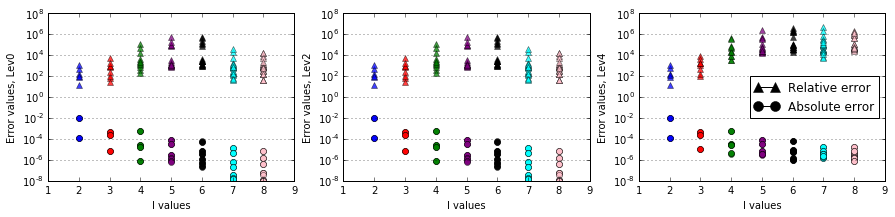

In [388]:
colors = ['blue','red','green','purple','black','cyan','pink','orange']

plt.figure(figsize=(15,3))

plt.subplot(131)
start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(absdiff_Lev0_R01[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(absdiff_Lev0_R02[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(absdiff_Lev0_R12[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev0_R01[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev0_R02[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev0_R12[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Error values, Lev0')
plt.xlabel(r'l values')
plt.xlim(1,9)
plt.ylim(10e-9,10e7)
plt.grid(axis='y')

plt.subplot(132)
start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(absdiff_Lev2_R01[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(absdiff_Lev2_R02[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(absdiff_Lev2_R12[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev2_R01[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev2_R02[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev2_R12[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Error values, Lev2')
plt.xlabel(r'l values')
plt.xlim(1,9)
plt.ylim(10e-9,10e7)
plt.grid(axis='y')

plt.subplot(133)
start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(absdiff_Lev4_R01[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(absdiff_Lev4_R02[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(absdiff_Lev4_R12[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev4_R01[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev4_R02[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(reldiff_Lev4_R12[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Error values, Lev4')
plt.xlabel(r'l values')
plt.xlim(1,9)
plt.ylim(10e-9,10e7)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='^',color='black', markersize=10, label='Relative error'),
                   Line2D([0], [0], marker='o', color='black', label='Absolute error', markersize=10)]

plt.legend(handles=legend_elements,loc='center right')
plt.grid(axis='y')
plt.show()

#### Well, that's not promising. Look at amplitudes and phases.

In [390]:
ampdiff_Lev0_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
ampdiff_Lev0_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
ampdiff_Lev0_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev0_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev0_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev0_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)

ampdiff_Lev2_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
ampdiff_Lev2_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
ampdiff_Lev2_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev2_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev2_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev2_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)

ampdiff_Lev4_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
ampdiff_Lev4_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
ampdiff_Lev4_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev4_R01 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev4_R02 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)
relampdiff_Lev4_R12 = np.empty((len(times_Lev0_R270), len(indices)), dtype=float)

In [391]:
for idx in range(len(indices)):
    ampdiff_Lev0_R01[:,idx] = abs(abs(N_Lev0_R270[:,indices[idx]]) - abs(N_Lev0_R440[:,indices[idx]]))
    ampdiff_Lev0_R02[:,idx] = abs(abs(N_Lev0_R270[:,indices[idx]]) - abs(N_Lev0_R610[:,indices[idx]]))
    ampdiff_Lev0_R12[:,idx] = abs(abs(N_Lev0_R440[:,indices[idx]]) - abs(N_Lev0_R610[:,indices[idx]]))
    ampdiff_Lev2_R01[:,idx] = abs(abs(N_Lev2_R270[:,indices[idx]]) - abs(N_Lev2_R440[:,indices[idx]]))
    ampdiff_Lev2_R02[:,idx] = abs(abs(N_Lev2_R270[:,indices[idx]]) - abs(N_Lev2_R610[:,indices[idx]]))
    ampdiff_Lev2_R12[:,idx] = abs(abs(N_Lev2_R440[:,indices[idx]]) - abs(N_Lev2_R610[:,indices[idx]]))
    ampdiff_Lev4_R01[:,idx] = abs(abs(N_Lev4_R270[:,indices[idx]]) - abs(N_Lev4_R440[:,indices[idx]]))
    ampdiff_Lev4_R02[:,idx] = abs(abs(N_Lev4_R270[:,indices[idx]]) - abs(N_Lev4_R610[:,indices[idx]]))
    ampdiff_Lev4_R12[:,idx] = abs(abs(N_Lev4_R440[:,indices[idx]]) - abs(N_Lev4_R610[:,indices[idx]]))
    
    #relative to larger extraction radius
    relampdiff_Lev0_R01[:,idx] = abs(abs(N_Lev0_R270[:,indices[idx]]) - abs(N_Lev0_R440[:,indices[idx]]))/abs(N_Lev0_R440[:,indices[idx]])
    relampdiff_Lev0_R02[:,idx] = abs(abs(N_Lev0_R270[:,indices[idx]]) - abs(N_Lev0_R610[:,indices[idx]]))/abs(N_Lev0_R610[:,indices[idx]])
    relampdiff_Lev0_R12[:,idx] = abs(abs(N_Lev0_R440[:,indices[idx]]) - abs(N_Lev0_R610[:,indices[idx]]))/abs(N_Lev0_R610[:,indices[idx]])
    relampdiff_Lev2_R01[:,idx] = abs(abs(N_Lev2_R270[:,indices[idx]]) - abs(N_Lev2_R440[:,indices[idx]]))/abs(N_Lev2_R440[:,indices[idx]])
    relampdiff_Lev2_R02[:,idx] = abs(abs(N_Lev2_R270[:,indices[idx]]) - abs(N_Lev2_R610[:,indices[idx]]))/abs(N_Lev2_R610[:,indices[idx]])
    relampdiff_Lev2_R12[:,idx] = abs(abs(N_Lev2_R440[:,indices[idx]]) - abs(N_Lev2_R610[:,indices[idx]]))/abs(N_Lev2_R610[:,indices[idx]])
    relampdiff_Lev4_R01[:,idx] = abs(abs(N_Lev4_R270[:,indices[idx]]) - abs(N_Lev4_R440[:,indices[idx]]))/abs(N_Lev4_R440[:,indices[idx]])
    relampdiff_Lev4_R02[:,idx] = abs(abs(N_Lev4_R270[:,indices[idx]]) - abs(N_Lev4_R610[:,indices[idx]]))/abs(N_Lev4_R610[:,indices[idx]])
    relampdiff_Lev4_R12[:,idx] = abs(abs(N_Lev4_R440[:,indices[idx]]) - abs(N_Lev4_R610[:,indices[idx]]))/abs(N_Lev4_R610[:,indices[idx]])

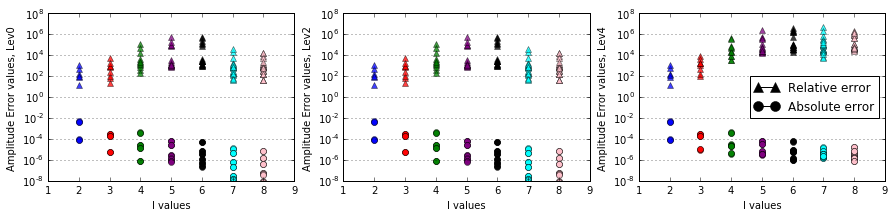

In [392]:
colors = ['blue','red','green','purple','black','cyan','pink','orange']

plt.figure(figsize=(15,3))

plt.subplot(131)
start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(ampdiff_Lev0_R01[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(ampdiff_Lev0_R02[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(ampdiff_Lev0_R12[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev0_R01[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev0_R02[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev0_R12[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Amplitude Error values, Lev0')
plt.xlabel(r'l values')
plt.xlim(1,9)
plt.ylim(10e-9,10e7)
plt.grid(axis='y')

plt.subplot(132)
start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(ampdiff_Lev2_R01[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(ampdiff_Lev2_R02[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(ampdiff_Lev2_R12[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev2_R01[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev2_R02[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev2_R12[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Amplitude Error values, Lev2')
plt.xlabel(r'l values')
plt.xlim(1,9)
plt.ylim(10e-9,10e7)
plt.grid(axis='y')

plt.subplot(133)
start=0
for l in range(2,9):
    for idx in reversed(range(l)):
        plt.semilogy(l,np.average(ampdiff_Lev4_R01[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(ampdiff_Lev4_R02[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(ampdiff_Lev4_R12[:,l-idx-1+start]),marker='o',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev4_R01[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev4_R02[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        plt.semilogy(l,np.average(relampdiff_Lev4_R12[:,l-idx-1+start]),marker = '^',color=colors[l-2],alpha=0.75)
        if idx==0:
            start=l-idx+start
        
plt.ylabel(r'Amplitude Error values, Lev4')
plt.xlabel(r'l values')
plt.xlim(1,9)
plt.ylim(10e-9,10e7)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='^',color='black', markersize=10, label='Relative error'),
                   Line2D([0], [0], marker='o', color='black', label='Absolute error', markersize=10)]

plt.legend(handles=legend_elements,loc='center right')
plt.grid(axis='y')
plt.show()

## Consider h and hdot.

### Comparison of Levs for each extraction order (ie. compare like extraction orders across Levs)

In [277]:
h_Lev0N2 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev0/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N2.dir')
h_Lev0N3 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev0/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N3.dir')
h_Lev0N4 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev0/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N4.dir')
h_Lev0Outer = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev0/rhOverM_Asymptotic_GeometricUnits.h5/OutermostExtraction.dir')
h_Lev2N2 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N2.dir')
h_Lev2N3 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N3.dir')
h_Lev2N4 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N4.dir')
h_Lev2Outer = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev2/rhOverM_Asymptotic_GeometricUnits.h5/OutermostExtraction.dir')
h_Lev4N2 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev4/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N2.dir')
h_Lev4N3 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev4/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N3.dir')
h_Lev4N4 = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev4/rhOverM_Asymptotic_GeometricUnits.h5/Extrapolated_N4.dir')
h_Lev4Outer = scri.SpEC.read_from_h5('/mnt/raid-project/nr/woodford/SimulationAnnex/Incoming/CSUF15/Batch1/BBH_SKS_d14.3_q1.22_sA_0_0_0_sB_0_0_0/Lev4/rhOverM_Asymptotic_GeometricUnits.h5/OutermostExtraction.dir')

In [280]:
np.shape(h_Lev0N2.data)

(13876, 77)

In [281]:
np.shape(h_Lev2N2.data)

(13843, 77)

#### Clearly not the same shape across Levs, or rather are of different lengths. 

In [286]:
LM_indices = [[2, 2], [2, 1], [3, 3], [3,2] , [3, 1], [4,4], [4,3], [4,2], [4,1], [5,5], [5,4], [5,3], [5,2], [5,1]]
LM_indices = [[ell, m] for ell, m in LM_indices if [ell, m] in h_N2.LM.tolist()]
hindices = [(ell * (ell + 1) - 2 ** 2 + m) for ell, m in LM_indices]

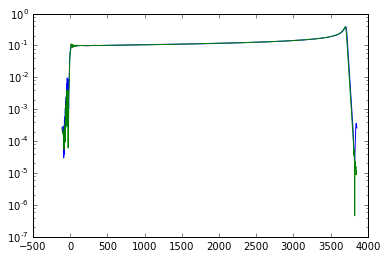

In [287]:
plt.semilogy(h_Lev0N2.t, abs(h_Lev0N2.data[:,hindices[0]]),color='blue')
plt.semilogy(h_Lev2N2.t, abs(h_Lev2N2.data[:,hindices[0]]),color='green')
plt.show()

In [292]:
h_Lev0N2.t[-1]

3852.7774085655014

### Comparison of Extraction orders (ie. compare results from each extraction order for each Lev)